# **Analysis of AMEO Data**
#**Introduction**
**Dataset Description**

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

**Objective**


The primary objective of this Exploratory Data Analysis (EDA) is to comprehensively explore the given dataset, focusing particularly on elucidating the characteristics of the data.

Key goals of this analysis encompass:

Offering an in-depth overview of the dataset's attributes and their

*   Offering an in-depth overview of the dataset's attributes and their significance.
*  Uncovering discernible patterns and trends within the dataset.


* Scrutinizing the connections between various independent variables and the target variable, Salary.
* Detecting and understanding any outliers or anomalies present in the dataset.
* Delivering practical insights and recommendations based on the analytical findings.


By undertaking this EDA, we aim to derive meaningful insights that can inform decision-making processes and enhance understanding of the underlying relationships within the data.

In [2]:
!pip install scipy
!pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',100)

# Importing the data-Set and dislaying the head, shape, descriptions of the dataset

In [4]:
data_df_original = pd.read_csv('AMCAT_DATA.csv')
data_df= data_df_original.copy()
data_df.head()

Unnamed: 0      ID   Salary               DOJ               DOL  \
0      train  203097   420000  06-01-2012 00:00           present   
1      train  579905   500000  09-01-2013 00:00           present   
2      train  810601   325000  06-01-2014 00:00           present   
3      train  267447  1100000  07-01-2011 00:00           present   
4      train  343523   200000  03-01-2014 00:00  03-01-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f      2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10-04-1989 00:00          85.4   
2          systems engineer    Chennai      f  08-03-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  12-05-1989 00:00          85.6   
4                       get    Manesar      m      2/27/91 0:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697 

# Shape

In [5]:
print(data_df.shape)

(3998, 39)


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   int64  
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [7]:
data_df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [8]:
data_df = data_df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
data_df.head()

Salary               DOJ               DOL               Designation  \
0   420000  06-01-2012 00:00           present   senior quality engineer   
1   500000  09-01-2013 00:00           present         assistant manager   
2   325000  06-01-2014 00:00           present          systems engineer   
3  1100000  07-01-2011 00:00           present  senior software engineer   
4   200000  03-01-2014 00:00  03-01-2015 00:00                       get   

     JobCity Gender               DOB  10percentage  \
0  Bangalore      f      2/19/90 0:00          84.3   
1     Indore      m  10-04-1989 00:00          85.4   
2    Chennai      f  08-03-1992 00:00          85.0   
3    Gurgaon      m  12-05-1989 00:00          85.6   
4    Manesar      m      2/27/91 0:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeTier       Degree  \
0  board of intermediate education,ap            2  B.Tech/B.E.   
1                                cbse            2  B.Tech/B.E.   
2                                cbse            2  B.Tech/B.E.   
3                                cbse            1  B.Tech/B.E.   
4                                cbse            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityTier  \
0                       computer engineering       78.00                0   
1  electronics and communication engineering       70.06                0   
2                     information technology       70.00                0   
3                       computer engineering       74.64                1   
4  electronics and communication engineering       73.90                0   

     CollegeState  GraduationYear  English  Logical  Quant    Domain  \
0  Andhra Pradesh            2011      515      585    525  0.635979   
1  Madhya Pradesh            2012      695      610    780  0.960603   
2   Uttar Pradesh            2014      615      545    370  0.450877   
3           Delhi            2011      635      585    625  0.974396   
4   Uttar Pradesh            2012      545      625    465  0.124502   

   ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0                  445                     -1               -1   
1                   -1                    466               -1   
2                  395                     -1               -1   
3                  615                     -1               -1   
4                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

# DATATYPES CONVERSION & DATA CLEANING


Given that the survey was conducted in 2015, we are assuming that respondents who indicated "present" for their Duration of Employment (DOL) actually left the company within 2015. Therefore, we will replace the "present" values in the DOL column with the current date, which is 2024-02-17.

converting DOL and DOJ to DateTime

In [9]:
data_df['DOL'].replace('present','2015-12-31', inplace = True)
data_df['DOL'] = pd.to_datetime(data_df['DOL'])
data_df['DOJ'] = pd.to_datetime(data_df['DOJ'])
data_df.head()

Salary        DOJ        DOL               Designation    JobCity Gender  \
0   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore      f   
1   500000 2013-09-01 2015-12-31         assistant manager     Indore      m   
2   325000 2014-06-01 2015-12-31          systems engineer    Chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon      m   
4   200000 2014-03-01 2015-03-01                       get    Manesar      m   

                DOB  10percentage                         10board  \
0      2/19/90 0:00          84.3  board ofsecondary education,ap   
1  10-04-1989 00:00          85.4                            cbse   
2  08-03-1992 00:00          85.0                            cbse   
3  12-05-1989 00:00          85.6                            cbse   
4      2/27/91 0:00          78.0                            cbse   

   12graduation  12percentage                             12board  \
0          2007          95.8  board of intermediate education,ap   
1          2007          85.0                                cbse   
2          2010          68.2                                cbse   
3          2007          83.6                                cbse   
4          2008          76.8                                cbse   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityTier    CollegeState  GraduationYear  English  \
0       78.00                0  Andhra Pradesh            2011      515   
1       70.06                0  Madhya Pradesh            2012      695   
2       70.00                0   Uttar Pradesh            2014      615   
3       74.64                1           Delhi            2011      635   
4       73.90                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295

There are some observations where DOL greater than DOJ in the data

In [10]:
dates = data_df[(data_df['DOL'] < data_df['DOJ'])].shape[0]
print(f'DOL is greater than DOJ for {dates} observations.')
print(data_df.shape)

DOL is greater than DOJ for 40 observations.
(3998, 35)


we will drop this 40 rows

In [11]:
data_df = data_df.drop(data_df[~(data_df['DOL'] > data_df['DOJ'])].index)
print(data_df.shape)

(3943, 35)


# Handling 0 and -1 values in the columns

In [12]:
zero_counts = (data_df == 0).sum()
non_zero_counts = zero_counts[zero_counts > 0]
print(non_zero_counts)


CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [13]:
neg_one_counts = (data_df == -1).sum()
neg_one_non_zero_counts = neg_one_counts[neg_one_counts > 0]
percentage_neg_one = neg_one_non_zero_counts / len(data_df) * 100
print(percentage_neg_one)


Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64


Categorical Columns should not contain 0 or -1 values so, we should replace them with Nan

In [14]:
data_df['10board'] = data_df['10board'].astype(str)
data_df['12board'] = data_df['12board'].astype(str)
data_df['JobCity'] = data_df['JobCity'].astype(str)

In [15]:
data_df['10board'] = data_df['10board'].replace({'0':np.nan})
data_df['12board'] = data_df['12board'].replace({'0':np.nan})
data_df['GraduationYear'] = data_df['GraduationYear'].replace({0:np.nan})
data_df['JobCity'] = data_df['JobCity'].replace({'-1':np.nan})
data_df['Domain'] = data_df['Domain'].replace({-1:np.nan})
data_df['ElectronicsAndSemicon'] = data_df['ElectronicsAndSemicon'].replace({-1:0})
data_df['ComputerScience'] = data_df['ComputerScience'].replace({-1:0})
data_df['ComputerProgramming'] = data_df['ComputerProgramming'].replace({-1:np.nan})

In [16]:
data_df['10board'] = data_df['10board'].astype('category')
data_df['12board'] = data_df['12board'].astype('category')
data_df['JobCity'] = data_df['JobCity'].astype('category')

# Imputation of columns

Now imputing categorical columns with mode values

In [17]:
data_df['10board'].fillna(data_df['10board'].mode()[0], inplace = True)
data_df['12board'].fillna(data_df['12board'].mode()[0], inplace = True)
data_df['GraduationYear'].fillna(data_df['GraduationYear'].mode()[0], inplace = True)
data_df['JobCity'].fillna(data_df['JobCity'].mode()[0], inplace = True)

data_df

Salary        DOJ        DOL                  Designation  \
0      420000 2012-06-01 2015-12-31      senior quality engineer   
1      500000 2013-09-01 2015-12-31            assistant manager   
2      325000 2014-06-01 2015-12-31             systems engineer   
3     1100000 2011-07-01 2015-12-31     senior software engineer   
4      200000 2014-03-01 2015-03-01                          get   
...       ...        ...        ...                          ...   
3992   800000 2014-04-01 2015-04-01                      manager   
3993   280000 2011-10-01 2012-10-01            software engineer   
3995   320000 2013-07-01 2015-12-31  associate software engineer   
3996   200000 2014-07-01 2015-01-01           software developer   
3997   400000 2013-02-01 2015-12-31      senior systems engineer   

               JobCity Gender               DOB  10percentage  \
0            Bangalore      f      2/19/90 0:00         84.30   
1               Indore      m  10-04-1989 00:00         85.40   
2              Chennai      f  08-03-1992 00:00         85.00   
3              Gurgaon      m  12-05-1989 00:00         85.60   
4              Manesar      m      2/27/91 0:00         78.00   
...                ...    ...               ...           ...   
3992            Rajkot      m      6/22/90 0:00         73.00   
3993        New Delhi       m      4/15/87 0:00         52.09   
3995         Bangalore      m  07-03-1991 00:00         81.86   
3996  Asifabadbanglore      f      3/20/92 0:00         78.72   
3997           Chennai      f      2/26/91 0:00         70.60   

                             10board  12graduation  12percentage  \
0     board ofsecondary education,ap          2007         95.80   
1                               cbse          2007         85.00   
2                               cbse          2010         68.20   
3                               cbse          2007         83.60   
4                               cbse          2008         76.80   
...                              ...           ...           ...   
3992                            cbse          2008         54.00   
3993                            cbse          2006         55.50   
3995                      bse,odisha          2008         65.50   
3996                     state board          2010         69.88   
3997                            cbse          2008         68.00   

                                 12board  CollegeTier       Degree  \
0     board of intermediate education,ap            2  B.Tech/B.E.   
1                                   cbse            2  B.Tech/B.E.   
2                                   cbse            2  B.Tech/B.E.   
3                                   cbse            1  B.Tech/B.E.   
4                                   cbse            2  B.Tech/B.E.   
...                                  ...          ...          ...   
3992                                cbse            2  B.Tech/B.E.   
3993                                cbse            2  B.Tech/B.E.   
3995                         chse,odisha            2  B.Tech/B.E.   
3996                         state board            2  B.Tech/B.E.   
3997                                cbse            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityTier  \
0                          computer engineering       78.00                0   
1     electronics and communication engineering       70.06                0   
2                        information technology       70.00                0   
3                          computer engineering       74.64                1   
4     electronics and communication engineering       73.90                0   
...                                         ...         ...              ...   
3992                          civil engineering       79.00                0   
3993                     information technology       61.50                0   
3995                       comp

Imputing Numerical Columns using Median values of their columns





In [18]:
data_df['Domain'].fillna(data_df['Domain'].median(), inplace = True)
data_df['ComputerProgramming'].fillna(data_df['ComputerProgramming'].median(), inplace = True)
data_df.head()

Salary        DOJ        DOL               Designation    JobCity Gender  \
0   420000 2012-06-01 2015-12-31   senior quality engineer  Bangalore      f   
1   500000 2013-09-01 2015-12-31         assistant manager     Indore      m   
2   325000 2014-06-01 2015-12-31          systems engineer    Chennai      f   
3  1100000 2011-07-01 2015-12-31  senior software engineer    Gurgaon      m   
4   200000 2014-03-01 2015-03-01                       get    Manesar      m   

                DOB  10percentage                         10board  \
0      2/19/90 0:00          84.3  board ofsecondary education,ap   
1  10-04-1989 00:00          85.4                            cbse   
2  08-03-1992 00:00          85.0                            cbse   
3  12-05-1989 00:00          85.6                            cbse   
4      2/27/91 0:00          78.0                            cbse   

   12graduation  12percentage                             12board  \
0          2007          95.8  board of intermediate education,ap   
1          2007          85.0                                cbse   
2          2010          68.2                                cbse   
3          2007          83.6                                cbse   
4          2008          76.8                                cbse   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityTier    CollegeState  GraduationYear  English  \
0       78.00                0  Andhra Pradesh          2011.0      515   
1       70.06                0  Madhya Pradesh          2012.0      695   
2       70.00                0   Uttar Pradesh          2014.0      615   
3       74.64                1           Delhi          2011.0      635   
4       73.90                0   Uttar Pradesh          2012.0      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                445.0                      0   
1      610    780  0.960603                455.0                    466   
2      545    370  0.450877                395.0                      0   
3      585    625  0.974396                615.0                      0   
4      625    465  0.124502                455.0                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                0              -1              -1           -1         -1   
1                0              -1              -1           -1         -1   
2                0              -1              -1           -1         -1   
3                0              -1              -1           -1         -1   
4                0              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295

# Convert the textual categories to lower case

In [19]:
def standardize_textual_data(column_name):
    '''
    Convert the textual categories in a column to lowercase
    and remove leading or trailing spaces.

    Parameters:
    - column_name (str): The column name for which the data needs to be standardized.
    '''
    data_df[column_name] = data_df[column_name].str.lower().str.strip()


text_columns_to_standardize = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

# Display the initial count of unique values in each column
for column in text_columns_to_standardize:
    print(f'Number of unique values in {column} before standardization: {data_df[column].nunique()}')

print("\n" + "=" * 50 + "\n")

for column in text_columns_to_standardize:
    standardize_textual_data(column)

# Display the count of unique values in each column after standardization
for column in text_columns_to_standardize:
    print(f'Number of unique values in {column} after standardization: {data_df[column].nunique()}')



Number of unique values in Designation before standardization: 416
Number of unique values in JobCity before standardization: 337
Number of unique values in 10board before standardization: 274
Number of unique values in 12board before standardization: 339
Number of unique values in Specialization before standardization: 46
Number of unique values in CollegeState before standardization: 26


Number of unique values in Designation after standardization: 416
Number of unique values in JobCity after standardization: 230
Number of unique values in 10board after standardization: 272
Number of unique values in 12board after standardization: 336
Number of unique values in Specialization after standardization: 46
Number of unique values in CollegeState after standardization: 26


## Dropping the rows where the graduationyear is greater than or equal to date of joining

In [20]:
len(data_df[(data_df['GraduationYear'] > data_df['DOJ'].dt.year)].index)

79

In [21]:
data_df = data_df.drop(data_df[(data_df['GraduationYear'] > data_df['DOJ'].dt.year)].index)

In [22]:
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [23]:
def collapsing_categories(data_df, data):
    for Designation in data_df[data].unique():
        min_count = data_df[data].value_counts()[:10].min()
        if data_df[data_df[data] == Designation][data].value_counts()[0] < min_count:
            data_df.loc[data_df[data] == Designation, data] = 'other'
for cols in textual_columns:
    collapsing_categories(data_df, cols)
for cols in textual_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(data_df[cols].value_counts())
    print('')
    print('*'*100)



Top 10 categories in: Designation

other                         2205
software engineer              525
software developer             258
system engineer                201
programmer analyst             137
systems engineer               116
java software engineer         108
software test engineer          98
project engineer                73
technical support engineer      72
senior software engineer        71
Name: Designation, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

bangalore    1085
other         778
noida         375
hyderabad     356
pune          318
chennai       310
gurgaon       209
new delhi     198
mumbai        119
kolkata       116
Name: JobCity, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

cbse                            1688
state board                     11

# UNIVARIATE ANALYSIS

# *Numerical Columns*

In [24]:
descriptive_stats = data_df['Salary'].describe()
print(descriptive_stats)

count    3.864000e+03
mean     3.093838e+05
std      2.125428e+05
min      3.500000e+04
25%      1.850000e+05
50%      3.000000e+05
75%      3.750000e+05
max      4.000000e+06
Name: Salary, dtype: float64


In [25]:
print("skew :",{round(data_df['Salary'].skew(),2)})


skew : {6.57}


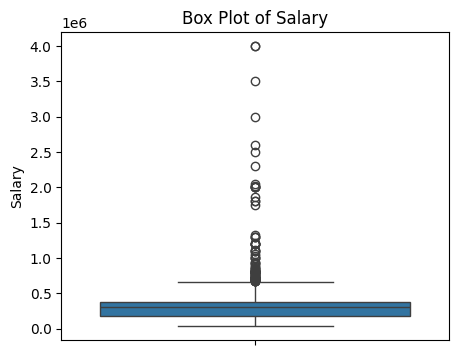

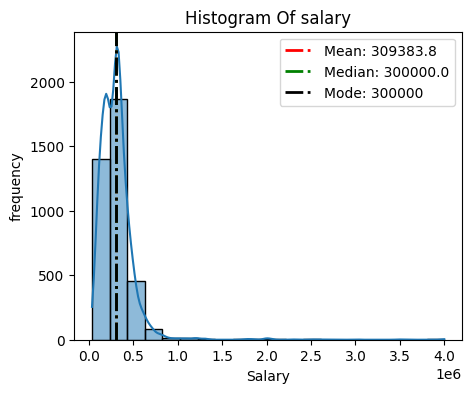

<ipython-input-26-15acf8307334>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Salary'], bins=20, kde=True, fit=norm)


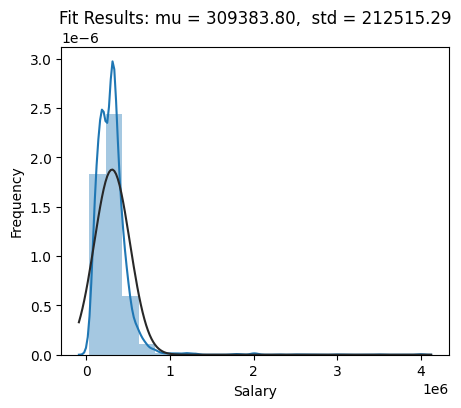

In [26]:
#boxplot
plt.figure(figsize=(5,4))
sns.boxplot(y=data_df['Salary'])
plt.title('Box Plot of Salary')
plt.ylabel('Salary')
plt.show()


#hisplot
plt.figure(figsize=(5,4))
sns.histplot(data_df['Salary'],bins=20, kde=True)
plt.title('Histogram Of salary')
plt.xlabel('Salary')
plt.ylabel('frequency')
plt.axvline(data_df['Salary'].mean(), label = f"Mean: {round(data_df['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['Salary'].median(), label = f"Median: {round(data_df['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['Salary'].mode()[0], label = f"Mode: {round(data_df['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()


#distplot

plt.figure(figsize=(5,4))

from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['Salary'])


sns.distplot(data_df['Salary'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Observations



1. Boxplot
*
The box plot shows that a significant number of data points have high salaries.

---

2. Histplot
*  The data is noticeably skewed towards higher values, with a skewness around 6, suggesting a departure from a normal distribution. The measures of central tendency (mean, median, and mode) are roughly equal.

---
3. Distplot

*   Shows a high Degree skewness and deviation from the Normal Data Distribution



# 10percentage

In [27]:
descriptive_10percentage = data_df['10percentage'].describe()
print(descriptive_10percentage)

count    3864.000000
mean       77.974503
std         9.832284
min        43.000000
25%        71.845000
50%        79.200000
75%        85.760000
max        97.760000
Name: 10percentage, dtype: float64


In [28]:
print("skew :",{round(data_df['10percentage'].skew(),2)})


skew : {-0.6}


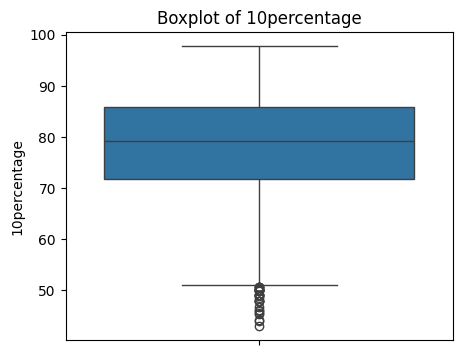

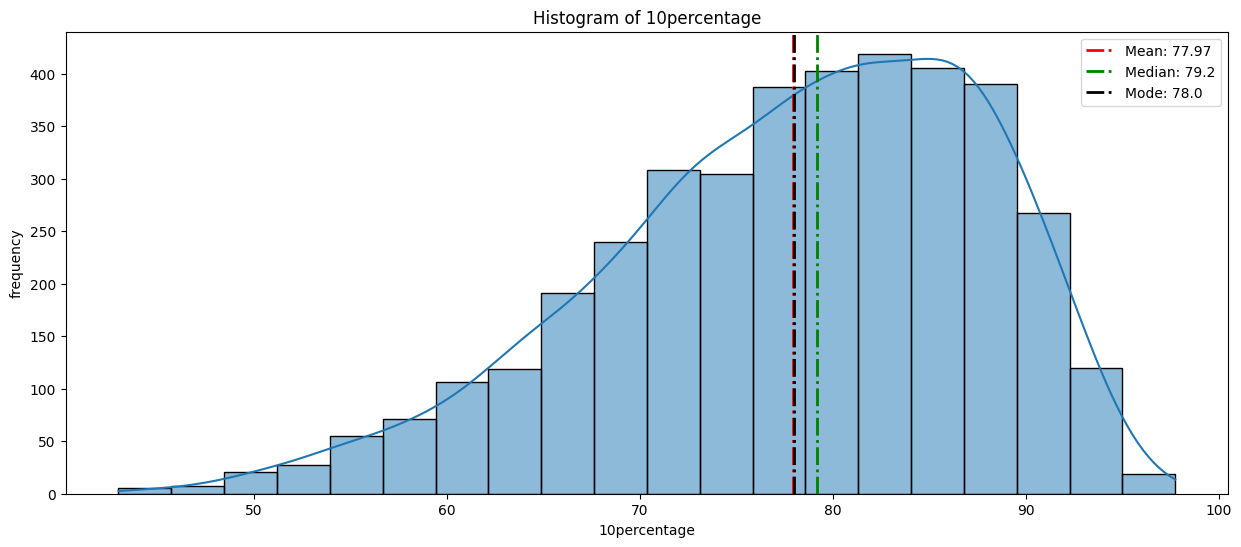

In [29]:
#boxplot
plt.figure(figsize=(5,4))
sns.boxplot(y=data_df['10percentage'])
plt.title('Boxplot of 10percentage')
plt.ylabel('10percentage')
plt.show()

#histplot

plt.figure(figsize=(15,6))
sns.histplot(data_df['10percentage'],bins=20,kde=True)
plt.title('Histogram of 10percentage')
plt.xlabel('10percentage')
plt.ylabel('frequency')
plt.axvline(data_df['10percentage'].mean(), label = f"Mean: {round(data_df['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['10percentage'].median(), label = f"Median: {round(data_df['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['10percentage'].mode()[0], label = f"Mode: {round(data_df['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-30-fec9d141f081>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['10percentage'], bins=20,  fit=norm)


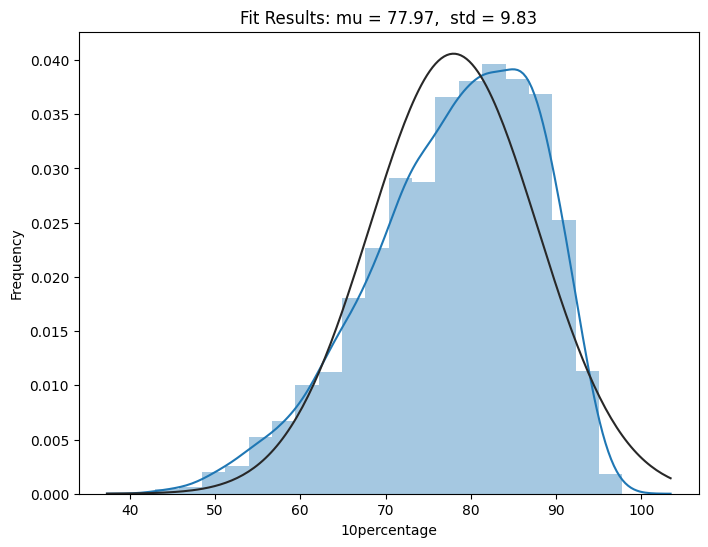

In [30]:

from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['10percentage'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_df['10percentage'], bins=20,  fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('10percentage')
plt.ylabel('Frequency')
plt.show()


Observations



1. Boxplot
*
We can see some Extreme Outliers Having percentages below 40%

---

2. Histplot
*  
The histogram shows few students with low percentages; most are in the 75% to 90% range. The highest frequency is at 78%, and the average score is around 77%.

---
3. Distplot

*   Shows some skewness and does not conform to a normal distribution pattern.



# 12percentage

In [31]:
descriptive_percentage = data_df['12percentage'].describe()
print(descriptive_percentage)



count    3864.000000
mean       74.514772
std        11.008297
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64


In [32]:
print("skew :", {round(data_df['12percentage'].skew(),2)})

skew : {-0.04}


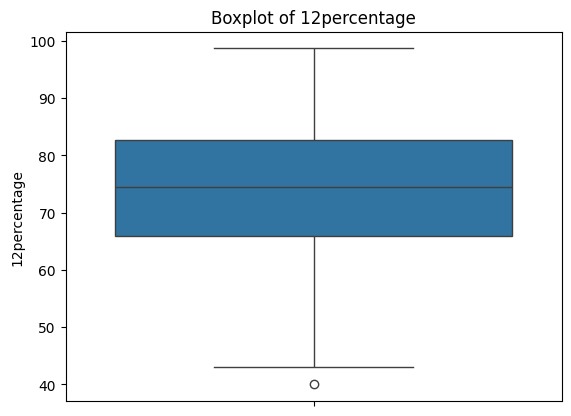

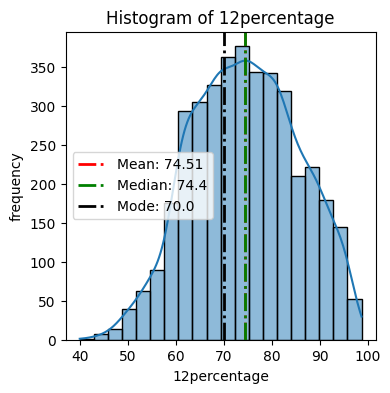

In [33]:

#boxplot
sns.boxplot(y=data_df['12percentage'])
plt.title('Boxplot of 12percentage')
plt.ylabel('12percentage')
plt.show()


#histplot

plt.figure(figsize=(4,4))
sns.histplot(data_df['12percentage'],bins=20,kde=True)
plt.title('Histogram of 12percentage')
plt.xlabel('12percentage')
plt.ylabel('frequency')
plt.axvline(data_df['12percentage'].mean(), label = f"Mean: {round(data_df['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['12percentage'].median(), label = f"Median: {round(data_df['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['12percentage'].mode()[0], label = f"Mode: {round(data_df['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-34-aef8cb78c986>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['12percentage'], bins=20, kde=True, fit=norm)


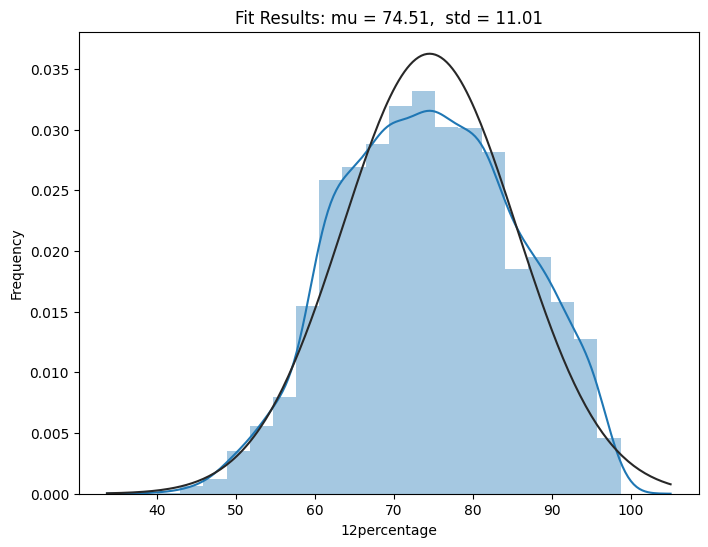

In [34]:

from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['12percentage'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_df['12percentage'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('12percentage')
plt.ylabel('Frequency')
plt.show()

**Observations**



1. Boxplot
*
Boxplot shows there is only one outlier with extreme low value.

---

2. Histplot
*  The histogram reveals that there are not many students with low percentages; most scores fall between 70% and 85%. The highest frequency is at 70%, and the average score is around 75%.


---
3. Distplot

*   The data shows devaition from the Normal Data Distribution so this data doesn't follow Normal Distribution.

# CLG CGPA


 Validating if the results are in percentages and not in CGPA

In [35]:
print((data_df['collegeGPA'] <=10).sum())

9


There were 12 observations where the entries were not percentages

In [36]:
data_df.loc[data_df['collegeGPA']<=10,'collegeGPA'].index
data_df.loc[data_df['collegeGPA']<=10,'collegeGPA'] = (data_df.loc[data_df['collegeGPA']<=10,'collegeGPA']/10)*100

In [37]:
descriptive_percentage = data_df['collegeGPA'].describe()
print(descriptive_percentage)

count    3864.000000
mean       71.697945
std         7.412470
min        49.070000
25%        66.500000
50%        71.775000
75%        76.400000
max        99.930000
Name: collegeGPA, dtype: float64


In [38]:
print("skew :", {round(data_df['collegeGPA'].skew(),2)})

skew : {0.18}


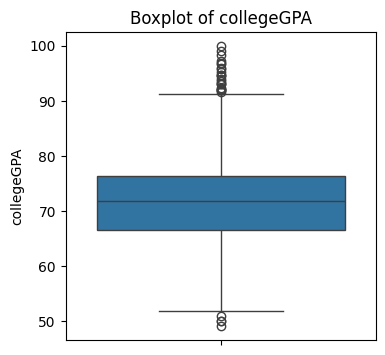

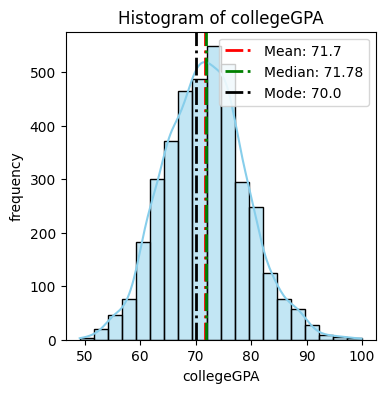

In [152]:
#boxplot
plt.figure(figsize=(4,4))
sns.boxplot(y=data_df['collegeGPA'])
plt.title('Boxplot of collegeGPA')
plt.ylabel('collegeGPA')
plt.show()


#histplot
plt.figure(figsize=(4,4))
sns.histplot(data_df['collegeGPA'],bins=20,kde=True,color = 'skyblue')
plt.title('Histogram of collegeGPA')
plt.xlabel('collegeGPA')
plt.ylabel('frequency')
plt.axvline(data_df['collegeGPA'].mean(), label = f"Mean: {round(data_df['collegeGPA'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['collegeGPA'].median(), label = f"Median: {round(data_df['collegeGPA'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['collegeGPA'].mode()[0], label = f"Mode: {round(data_df['collegeGPA'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)

plt.legend()
plt.show()

<ipython-input-40-266d61beec5f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['collegeGPA'], bins=20, kde=True, fit=norm)


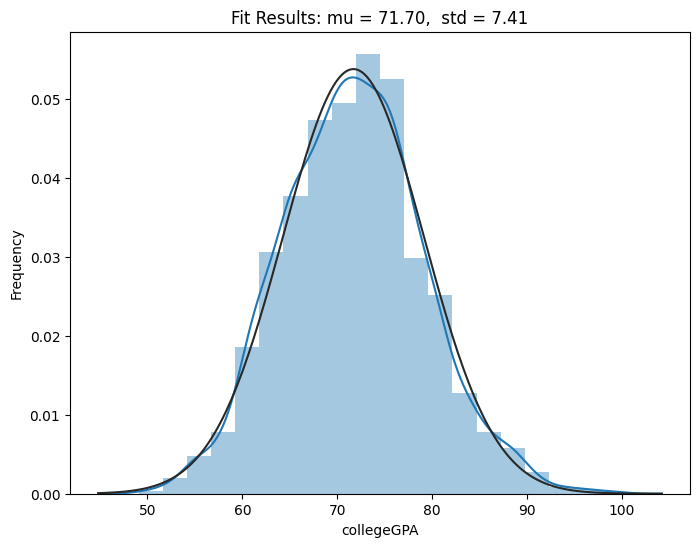

In [40]:
from scipy.stats import norm

mu, std = norm.fit(data_df['collegeGPA'])

plt.figure(figsize=(8, 6))
sns.distplot(data_df['collegeGPA'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('collegeGPA')
plt.ylabel('Frequency')
plt.show()

**Observations**



1. Boxplot
*
The box plot shows the presence of both low and high extreme values within the dataset.

---

2. Histplot
*  
Most students had GPAs between 65% and 80%. The most common GPA was around 71%, and the average GPA stood at 74%.


---
3. Distplot

*   
The data is considered to be reasonably normally distributed.

# English

In [41]:
descriptive_percentage = data_df['English'].describe()
print(descriptive_percentage)

count    3864.000000
mean      501.591097
std       104.509765
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64


In [42]:
print("skew :",{round(data_df['English'].skew(),2)})

skew : {0.19}


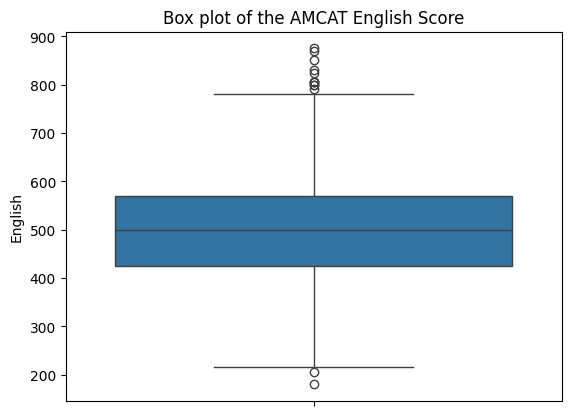

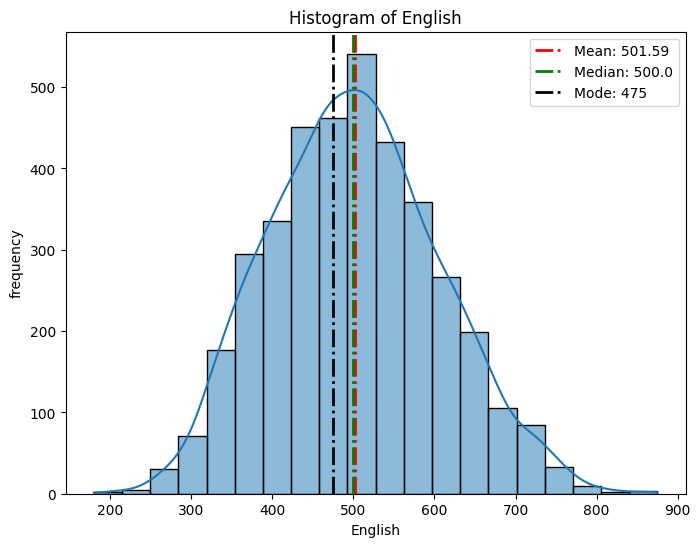

In [43]:
#barplot

sns.boxplot(y=data_df['English'])
plt.title('Box plot of the AMCAT English Score')
plt.ylabel('English')
plt.show()


#histplot

plt.figure(figsize=(8,6))
sns.histplot(data_df['English'],bins=20,kde=True)
plt.title('Histogram of English')
plt.xlabel('English')
plt.ylabel('frequency')
plt.axvline(data_df['English'].mean(), label = f"Mean: {round(data_df['English'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['English'].median(), label = f"Median: {round(data_df['English'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['English'].mode()[0], label = f"Mode: {round(data_df['English'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-44-d5f4e5945e4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['English'], bins=20, kde=True, fit=norm)


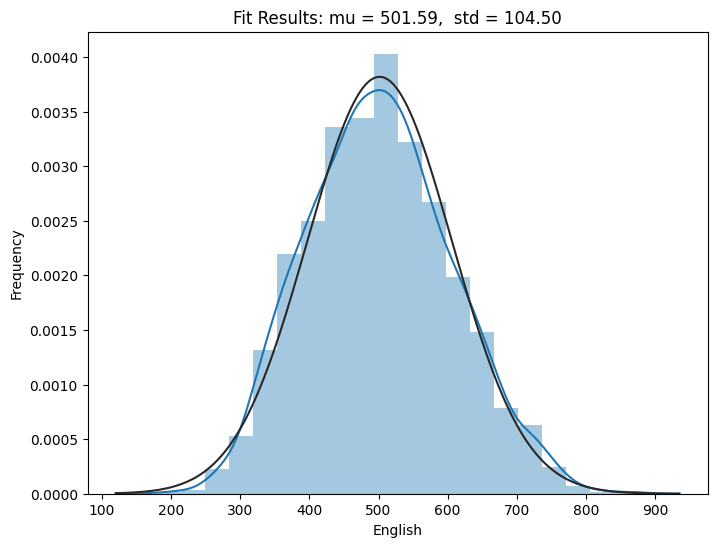

In [44]:
from scipy.stats import norm

mu, std = norm.fit(data_df['English'])

plt.figure(figsize=(8, 6))
sns.distplot(data_df['English'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('English')
plt.ylabel('Frequency')
plt.show()

**Observations**



1. Boxplot
*
Extreme values are noticeable at both ends of the distribution.

---

2. Histplot
*  
Most scores were in the range of 400 to 550. The highest point was at 475, and the average score was 502.


---
3. Distplot

*   
The data is considered to be reasonably normally distributed.

# LOGICAL AMCAT SCORE

In [45]:
descriptive_percentage = data_df['Logical'].describe()
print(descriptive_percentage)

count    3864.000000
mean      501.652950
std        86.555756
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64


In [46]:
print("skew :",{round(data_df['Logical'].skew(),2)})

skew : {-0.21}


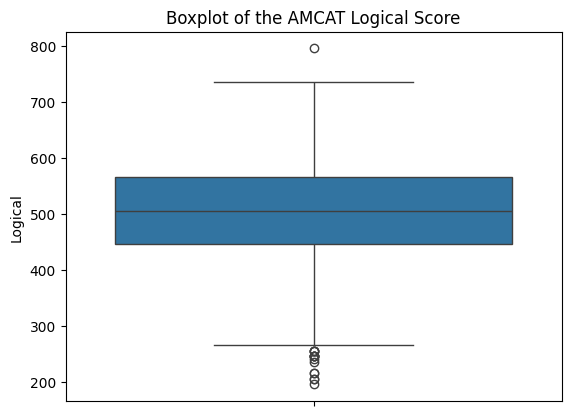

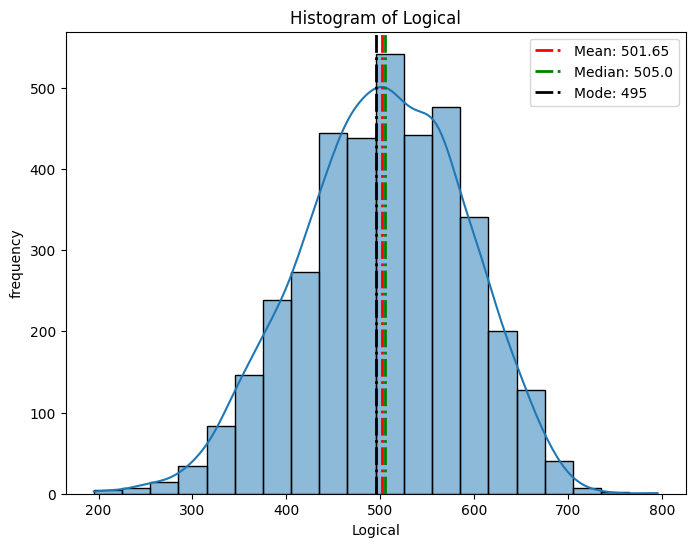

In [47]:

#boxplot
sns.boxplot(y=data_df['Logical'])
plt.title('Boxplot of the AMCAT Logical Score')
plt.ylabel('Logical')
plt.show()


#hisplot
plt.figure(figsize=(8,6))
sns.histplot(data_df['Logical'],bins=20,kde=True)
plt.title('Histogram of Logical')
plt.xlabel('Logical')
plt.ylabel('frequency')
plt.axvline(data_df['Logical'].mean(), label = f"Mean: {round(data_df['Logical'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['Logical'].median(), label = f"Median: {round(data_df['Logical'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['Logical'].mode()[0], label = f"Mode: {round(data_df['Logical'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-48-13bf4a478878>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Logical'], bins=20, kde=True, fit=norm)


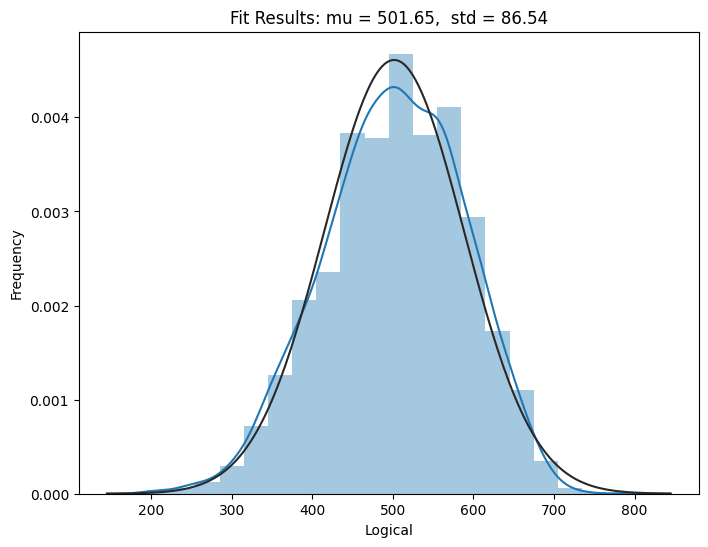

In [48]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['Logical'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_df['Logical'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('Logical')
plt.ylabel('Frequency')
plt.show()

**Observations**



1. Boxplot
*

There are some lower extreme values, and only one high extreme value stands out.

---

2. Histplot
*  
The majority of scores were in the range of 455 to 585, reaching the highest point at 500, with an average of 502.


---
3. Distplot

*   
The data is considered to be reasonably normally distributed.

# AMCAT QUANT SCORE

In [49]:
descriptive_percentage = data_df['Quant'].describe()
print(descriptive_percentage)

count    3864.000000
mean      513.717133
std       122.171597
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64


In [50]:
print("skew :",{round(data_df['Quant'].skew(),2)})

skew : {-0.01}


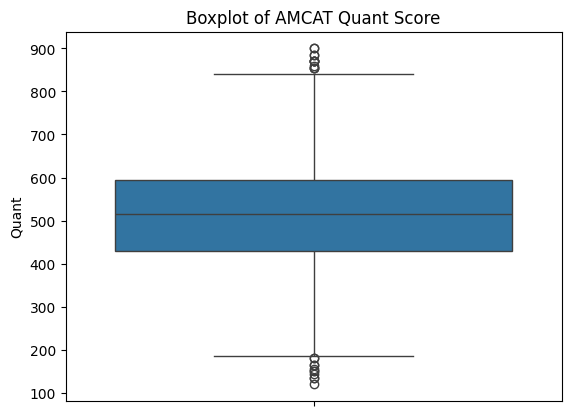

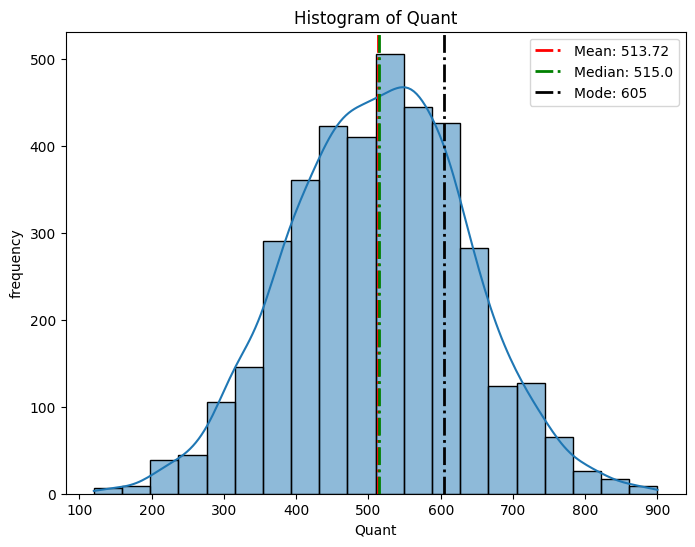

In [51]:
#barplot
sns.boxplot(y=data_df['Quant'])
plt.title('Boxplot of AMCAT Quant Score')
plt.ylabel('Quant')
plt.show()

#hisplot
plt.figure(figsize=(8,6))
sns.histplot(data_df['Quant'],bins=20,kde=True)
plt.title('Histogram of Quant')
plt.xlabel('Quant')
plt.ylabel('frequency')
plt.axvline(data_df['Quant'].mean(), label = f"Mean: {round(data_df['Quant'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['Quant'].median(), label = f"Median: {round(data_df['Quant'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['Quant'].mode()[0], label = f"Mode: {round(data_df['Quant'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-52-e57c13f945b5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Quant'], bins=20, kde=True, fit=norm)


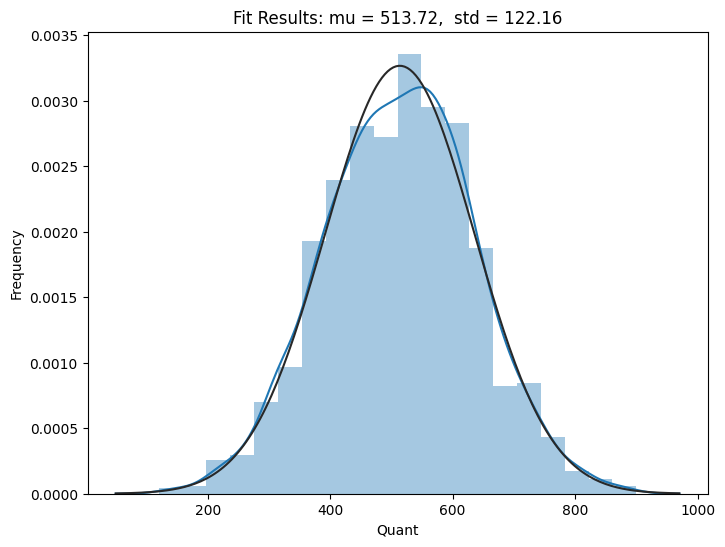

In [52]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['Quant'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_df['Quant'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('Quant')
plt.ylabel('Frequency')
plt.show()

**Observations**



1. Boxplot
*

The box plot shows the presence of both low and high extreme values.

---

2. Histplot
*  
Majority of the scores were in between 425-600. The maximum number of students scored around 550 with an average of 513.


---
3. Distplot

*   
	The data is sufficiently close to normally distributed.


# ComputerProgramming

In [53]:
descriptive_percentage = data_df['ComputerProgramming'].describe()
print(descriptive_percentage)

count    3864.000000
mean      452.441511
std        85.997659
min       115.000000
25%       405.000000
50%       455.000000
75%       495.000000
max       840.000000
Name: ComputerProgramming, dtype: float64


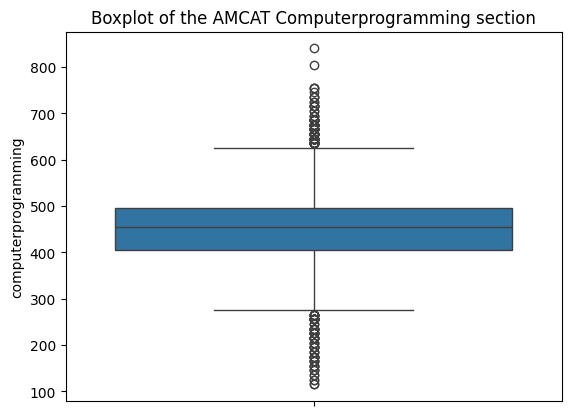

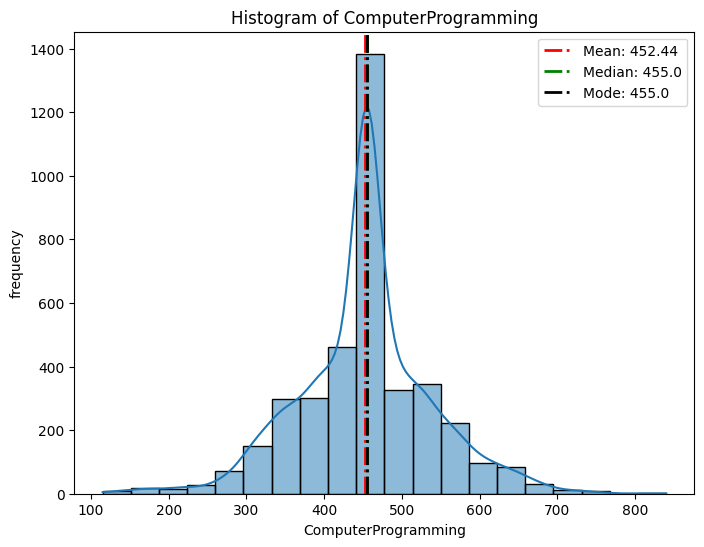

In [54]:
#boxplot
sns.boxplot(y=data_df['ComputerProgramming'])
plt.title('Boxplot of the AMCAT Computerprogramming section')
plt.ylabel('computerprogramming')
plt.show()

#hisplot
plt.figure(figsize=(8,6))
sns.histplot(data_df['ComputerProgramming'],bins=20,kde=True)
plt.title('Histogram of ComputerProgramming')
plt.xlabel('ComputerProgramming')
plt.ylabel('frequency')

plt.axvline(data_df['ComputerProgramming'].mean(), label = f"Mean: {round(data_df['ComputerProgramming'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['ComputerProgramming'].median(), label = f"Median: {round(data_df['ComputerProgramming'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['ComputerProgramming'].mode()[0], label = f"Mode: {round(data_df['ComputerProgramming'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-55-ca524f43c72c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['ComputerProgramming'], bins=20, kde=True, fit=norm)


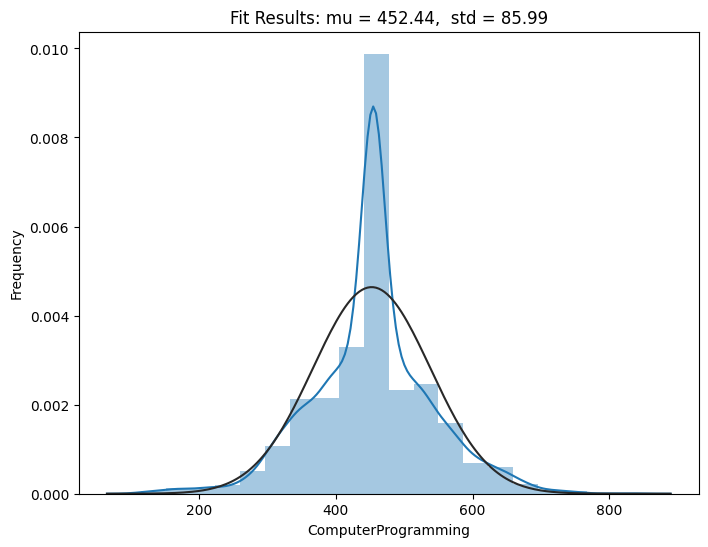

In [55]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['ComputerProgramming'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_df['ComputerProgramming'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('ComputerProgramming')
plt.ylabel('Frequency')
plt.show()


**Observations**



1. Boxplot
*

The box plot indicates the existence of numerous low and high extreme values.
---

2. Histplot
*  
The majority of scores ranged between 415 and 460. The peak occurred at 450, with an average score of 452


---
3. Distplot

*  The data doesn't follows Normal Distribution

# ElectronicsAndSemicon

In [56]:
descriptive_percentage = data_df['ElectronicsAndSemicon'].describe()
print(descriptive_percentage)

count    3864.000000
mean       96.441253
std       158.045705
min         0.000000
25%         0.000000
50%         0.000000
75%       233.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64


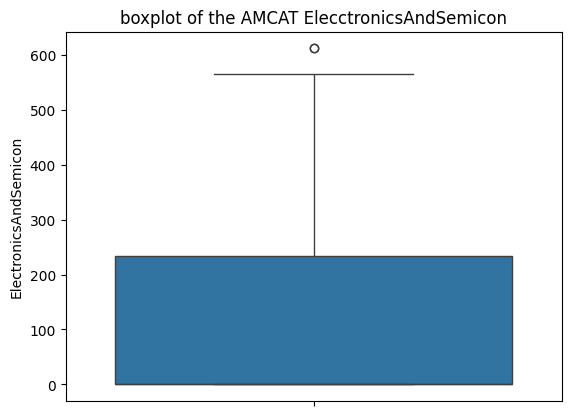

In [57]:
#boxplot
sns.boxplot(y=data_df['ElectronicsAndSemicon'])
plt.title('boxplot of the AMCAT ElecctronicsAndSemicon')
plt.ylabel('ElectronicsAndSemicon')
plt.show()

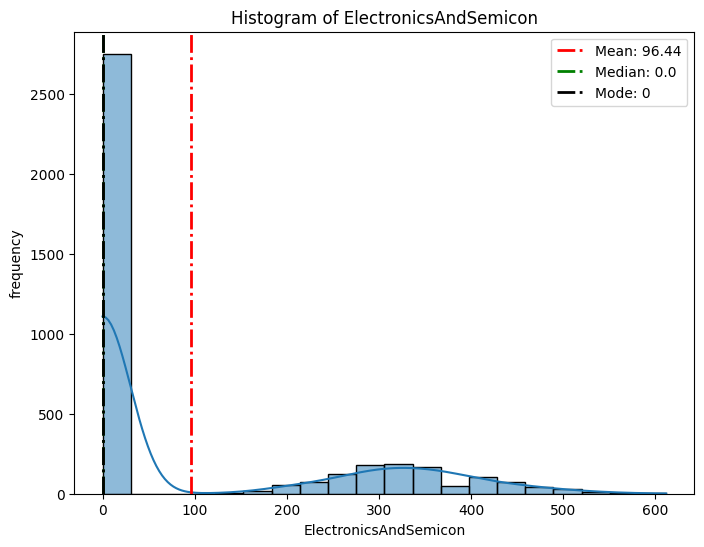

In [58]:
plt.figure(figsize=(8,6))
sns.histplot(data_df['ElectronicsAndSemicon'],bins=20,kde=True)
plt.title('Histogram of ElectronicsAndSemicon')
plt.xlabel('ElectronicsAndSemicon')
plt.ylabel('frequency')
plt.axvline(data_df['ElectronicsAndSemicon'].mean(), label = f"Mean: {round(data_df['ElectronicsAndSemicon'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(data_df['ElectronicsAndSemicon'].median(), label = f"Median: {round(data_df['ElectronicsAndSemicon'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(data_df['ElectronicsAndSemicon'].mode()[0], label = f"Mode: {round(data_df['ElectronicsAndSemicon'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
plt.legend()
plt.show()

<ipython-input-59-9a220def6094>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['ElectronicsAndSemicon'], bins=20, kde=True, fit=norm)


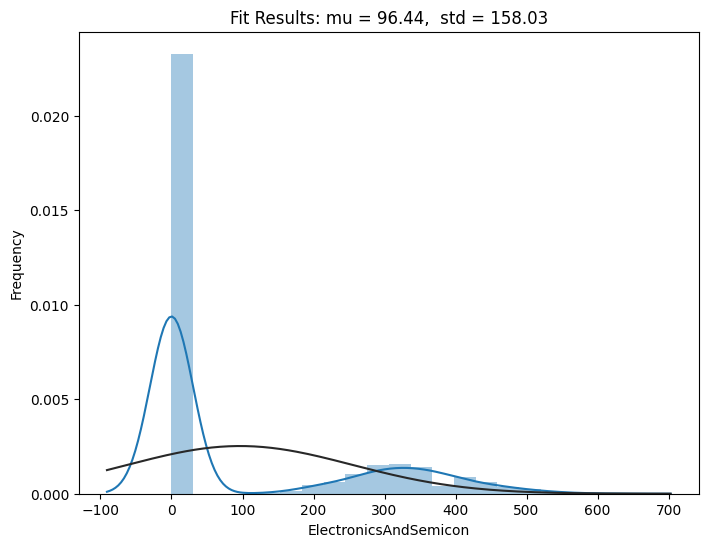

In [59]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['ElectronicsAndSemicon'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_df['ElectronicsAndSemicon'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('ElectronicsAndSemicon')
plt.ylabel('Frequency')
plt.show()

**Observations**



1. Boxplot
*

The lowest score is equal to the median of the dataset.
---

2. Histplot
*  
The majority of scores were between 0 and 25. The highest number of students scored 0, and the average score was 96.


---
3. Distplot

*  The data doesn't follows Normal Distribution

# MechanicalEngg


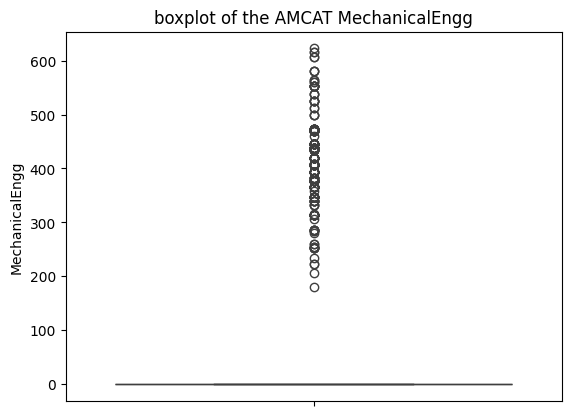

In [60]:
sns.boxplot(y=data_df['MechanicalEngg'])
plt.title('boxplot of the AMCAT MechanicalEngg')
plt.ylabel('MechanicalEngg')
plt.show()


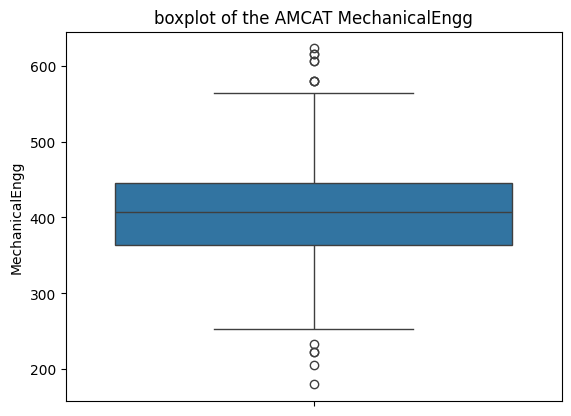

In [61]:
data_frame = data_df[data_df['MechanicalEngg']>-1]
sns.boxplot(y=data_frame['MechanicalEngg'])
plt.title('boxplot of the AMCAT MechanicalEngg')
plt.ylabel('MechanicalEngg')
plt.show()

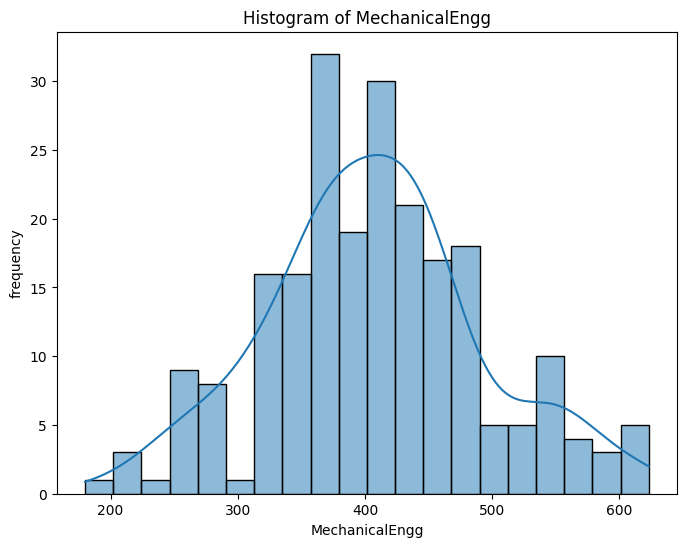

In [62]:
plt.figure(figsize=(8,6))
sns.histplot(data_frame['MechanicalEngg'],bins=20,kde=True)
plt.title('Histogram of MechanicalEngg')
plt.xlabel('MechanicalEngg')
plt.ylabel('frequency')
plt.show()

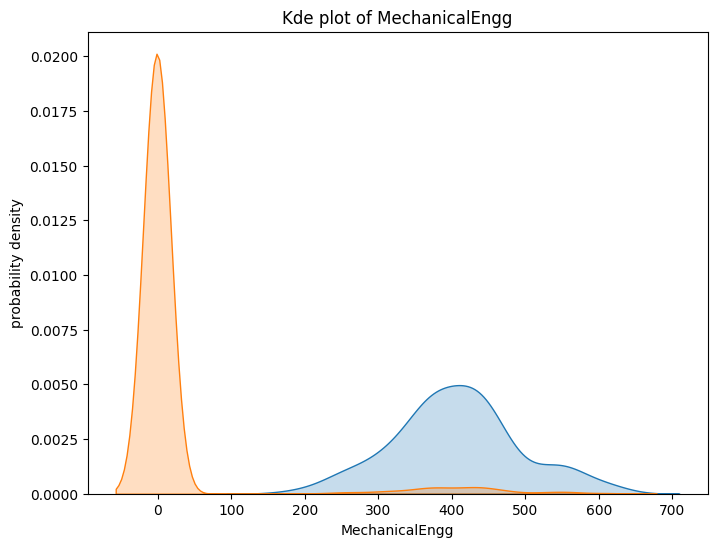

In [63]:
plt.figure(figsize=(8,6))
sns.kdeplot(data_frame['MechanicalEngg'],fill=True)
sns.kdeplot(data_df['MechanicalEngg'], fill =True)
plt.title('Kde plot of MechanicalEngg')
plt.xlabel('MechanicalEngg')
plt.ylabel('probability density')
plt.show()

<ipython-input-64-13293cf4b5be>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['MechanicalEngg'], bins=20, kde=True, fit=norm)


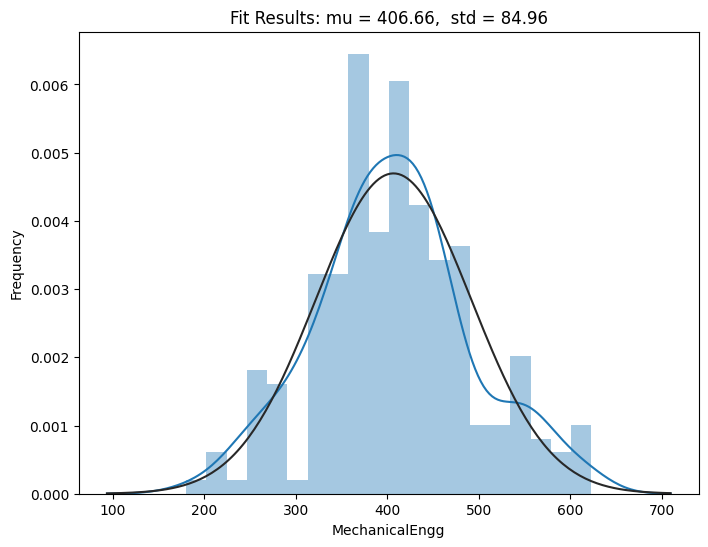

In [64]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_frame['MechanicalEngg'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_frame['MechanicalEngg'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('MechanicalEngg')
plt.ylabel('Frequency')
plt.show()

# ElectricalEngg

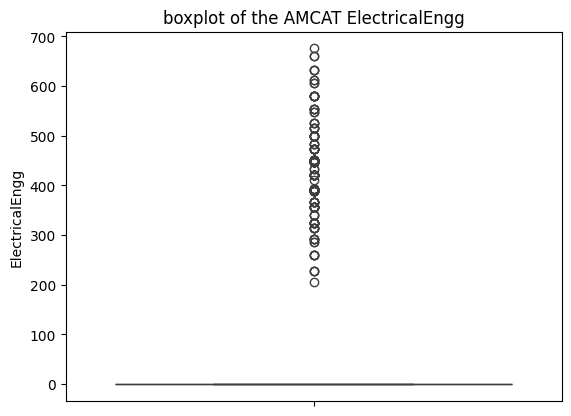

In [65]:
sns.boxplot(y=data_df['ElectricalEngg'])
plt.title('boxplot of the AMCAT ElectricalEngg')
plt.ylabel('ElectricalEngg')
plt.show()

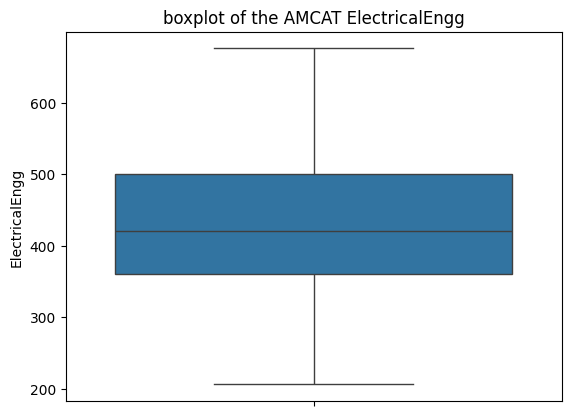

In [66]:
data_frame = data_df[data_df['ElectricalEngg']>-1]
sns.boxplot(y=data_frame['ElectricalEngg'])
plt.title('boxplot of the AMCAT ElectricalEngg')
plt.ylabel('ElectricalEngg')
plt.show()

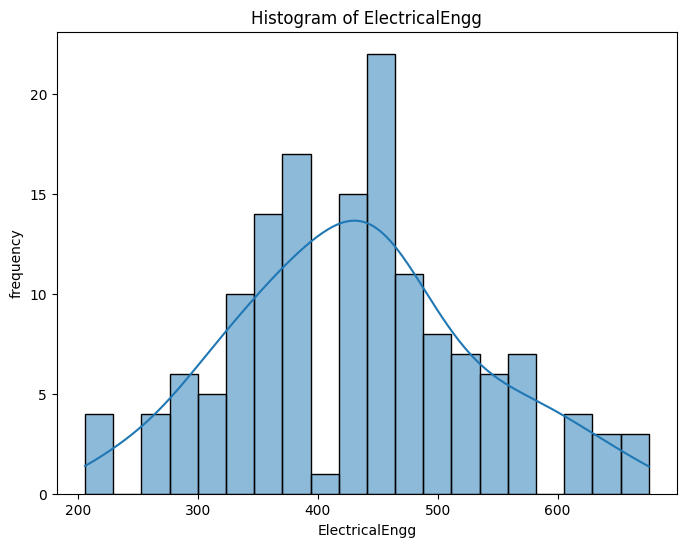

In [67]:
plt.figure(figsize=(8,6))
sns.histplot(data_frame['ElectricalEngg'],bins=20,kde=True)

plt.title('Histogram of ElectricalEngg')
plt.xlabel('ElectricalEngg')
plt.ylabel('frequency')
plt.show()

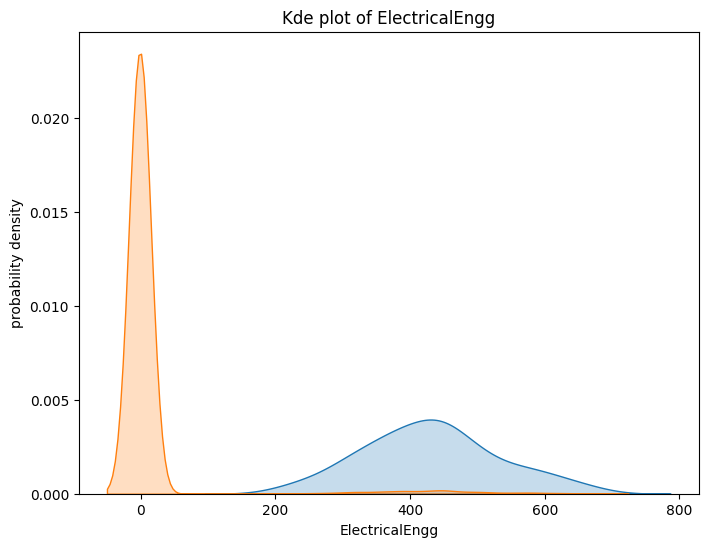

In [68]:
plt.figure(figsize=(8,6))
sns.kdeplot(data_frame['ElectricalEngg'],fill=True)
sns.kdeplot(data_df['ElectricalEngg'],fill=True)
plt.title('Kde plot of ElectricalEngg')
plt.xlabel('ElectricalEngg')
plt.ylabel('probability density')
plt.show()


<ipython-input-69-54668f8f157f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['ElectricalEngg'], bins=20, kde=True, fit=norm)


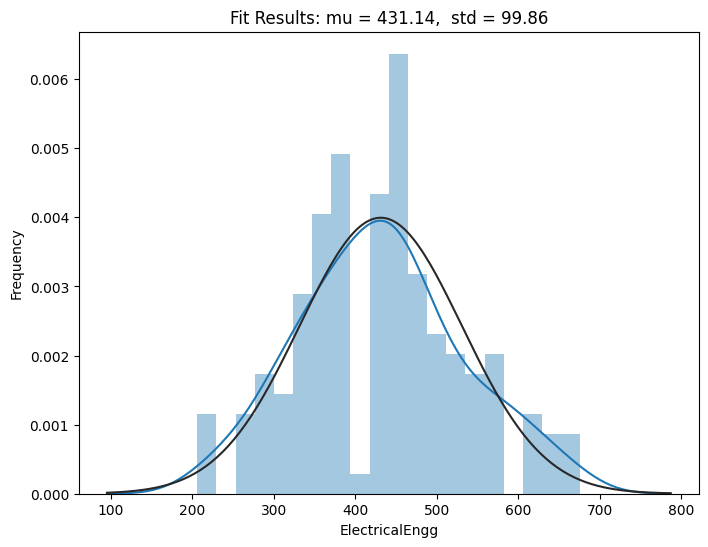

In [69]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_frame['ElectricalEngg'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_frame['ElectricalEngg'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('ElectricalEngg')
plt.ylabel('Frequency')
plt.show()

# TelecomEngg

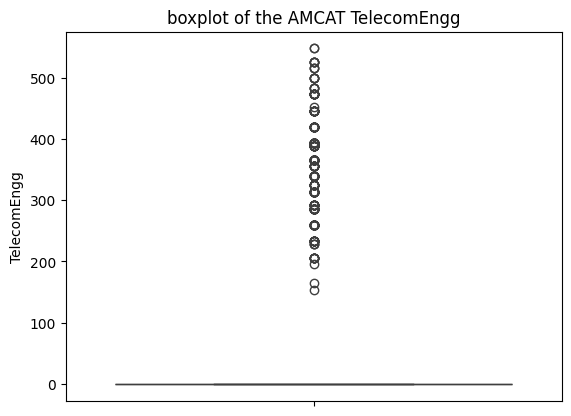

In [70]:
#data_frame = data_df[data_df['ElectricalEngg']>-1]
sns.boxplot(y=data_df['TelecomEngg'])
plt.title('boxplot of the AMCAT TelecomEngg')
plt.ylabel('TelecomEngg')
plt.show()

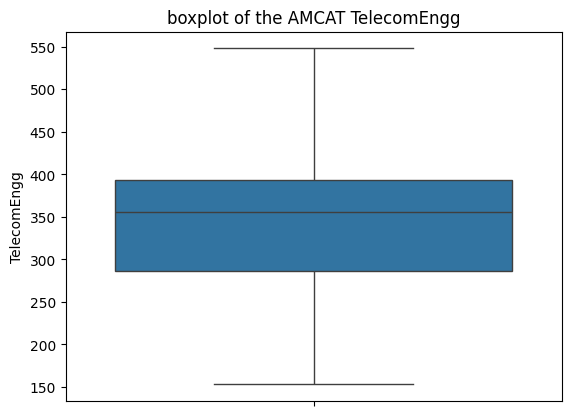

In [71]:
data_frame = data_df[data_df['TelecomEngg']>-1]
sns.boxplot(y=data_frame['TelecomEngg'])
plt.title('boxplot of the AMCAT TelecomEngg')
plt.ylabel('TelecomEngg')
plt.show()

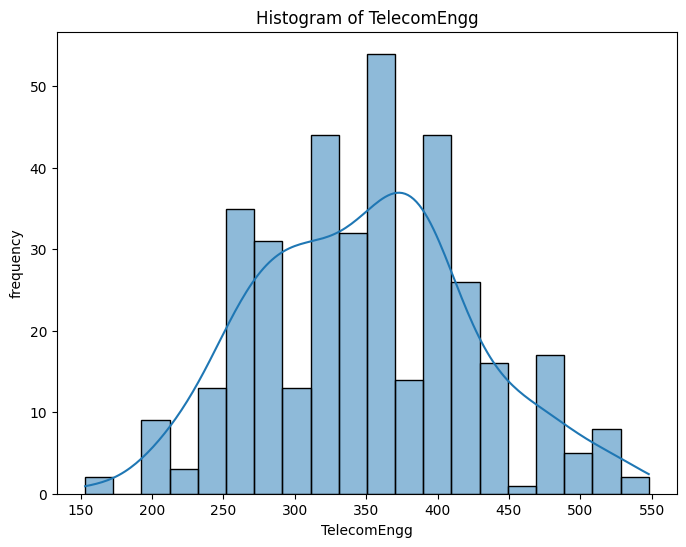

In [72]:
plt.figure(figsize=(8,6))
sns.histplot(data_frame['TelecomEngg'],bins=20,kde=True)
plt.title('Histogram of TelecomEngg')
plt.xlabel('TelecomEngg')
plt.ylabel('frequency')
plt.show()

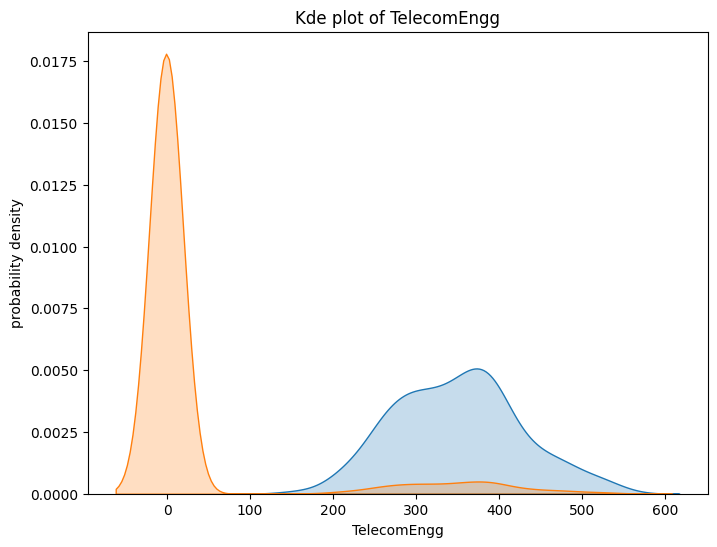

In [73]:
plt.figure(figsize=(8,6))
sns.kdeplot(data_frame['TelecomEngg'],fill=True)
sns.kdeplot(data_df['TelecomEngg'],fill = True)
plt.title('Kde plot of TelecomEngg')
plt.xlabel('TelecomEngg')
plt.ylabel('probability density')
plt.show()


<ipython-input-74-ce7179171b60>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['TelecomEngg'], bins=20, kde=True, fit=norm)


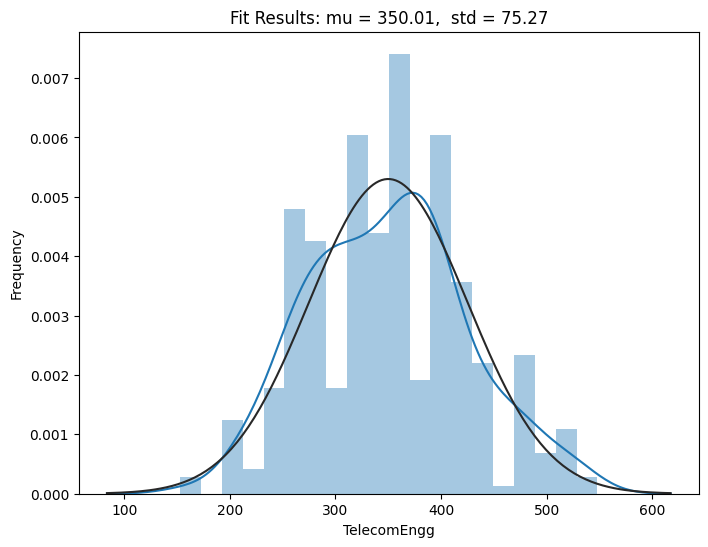

In [74]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_frame['TelecomEngg'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_frame['TelecomEngg'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('TelecomEngg')
plt.ylabel('Frequency')
plt.show()

# CivilEngg

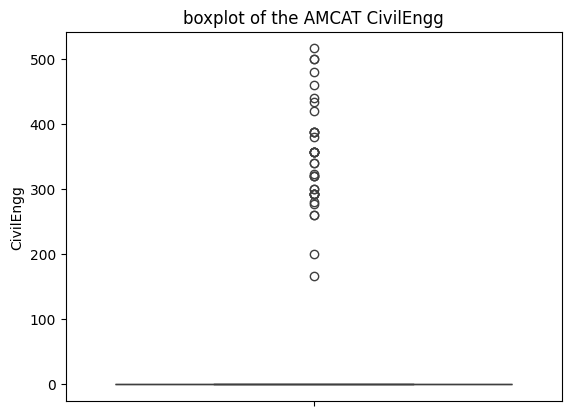

In [75]:
#data_frame = data_df[data_df['CivilEngg']>-1]
sns.boxplot(y=data_df['CivilEngg'])
plt.title('boxplot of the AMCAT CivilEngg')
plt.ylabel('CivilEngg')
plt.show()

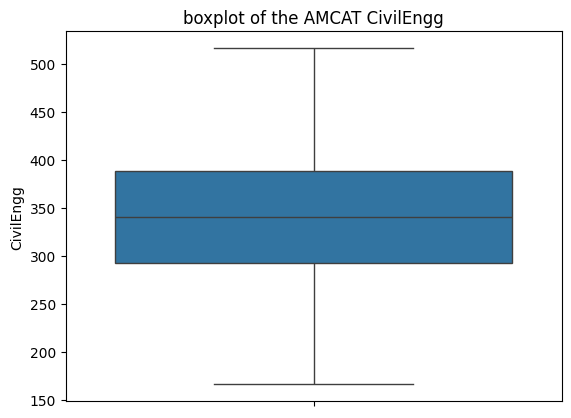

In [76]:
data_frame = data_df[data_df['CivilEngg']>-1]
sns.boxplot(y=data_frame['CivilEngg'])
plt.title('boxplot of the AMCAT CivilEngg')
plt.ylabel('CivilEngg')
plt.show()

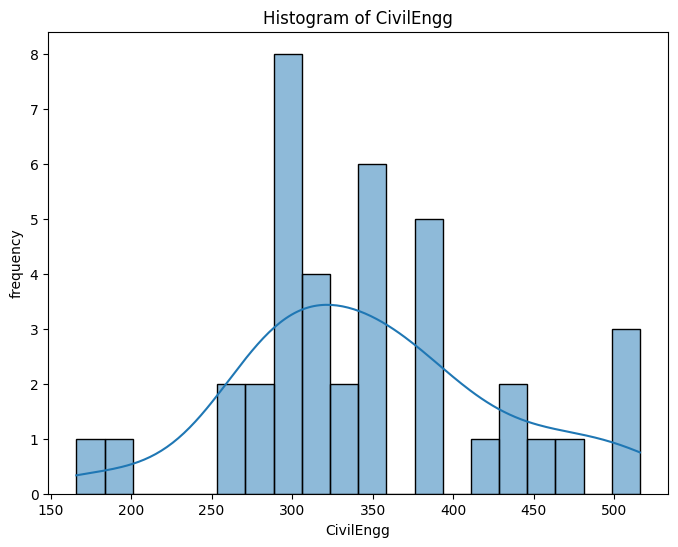

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(data_frame['CivilEngg'],bins=20,kde=True)
plt.title('Histogram of CivilEngg')
plt.xlabel('CivilEngg')
plt.ylabel('frequency')
plt.show()

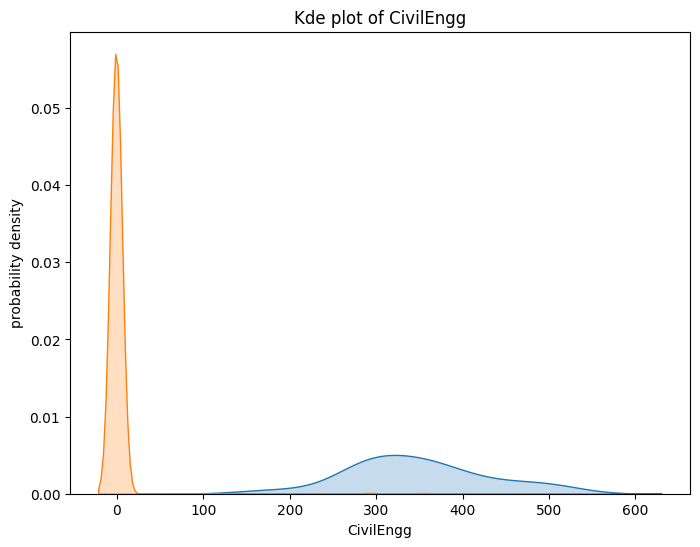

In [78]:
plt.figure(figsize=(8,6))
sns.kdeplot(data_frame['CivilEngg'],fill=True)
sns.kdeplot(data_df['CivilEngg'],fill=True)
plt.title('Kde plot of CivilEngg')
plt.xlabel('CivilEngg')
plt.ylabel('probability density')
plt.show()

<ipython-input-79-3ea56a5ce47e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['CivilEngg'], bins=20, kde=True, fit=norm)


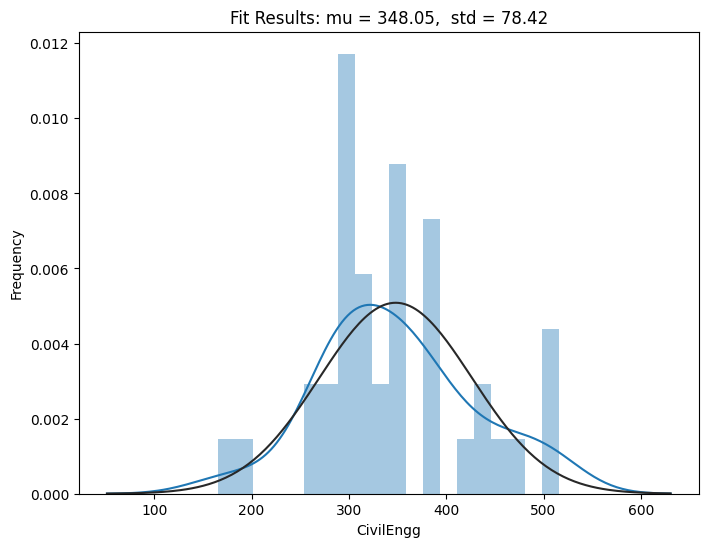

In [79]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_frame['CivilEngg'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_frame['CivilEngg'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('CivilEngg')
plt.ylabel('Frequency')
plt.show()


# conscientiousness

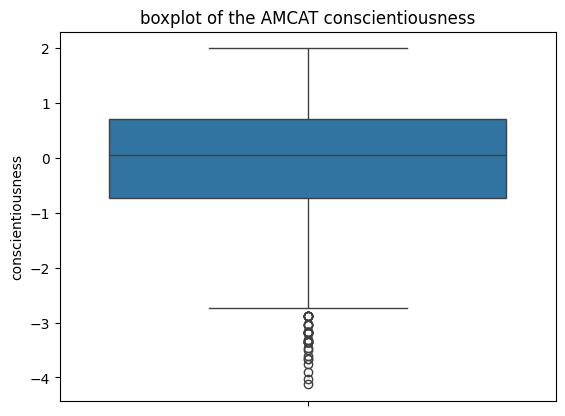

In [80]:

sns.boxplot(y=data_df['conscientiousness'])
plt.title('boxplot of the AMCAT conscientiousness')
plt.ylabel('conscientiousness')
plt.show()

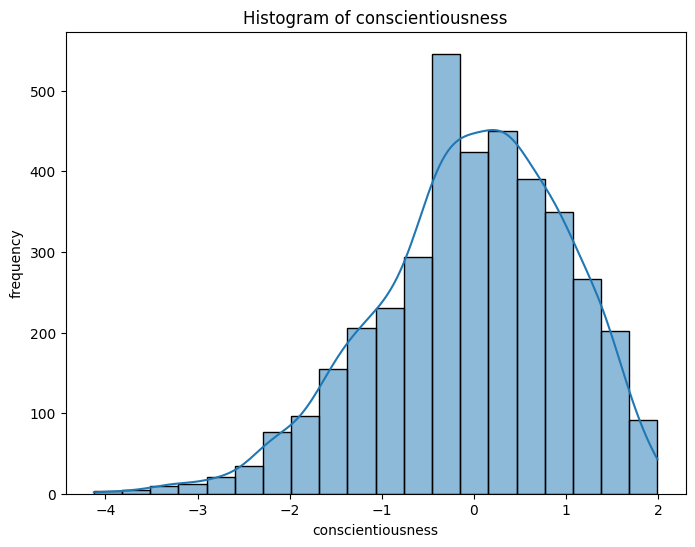

In [81]:

plt.figure(figsize=(8,6))
sns.histplot(data_df['conscientiousness'],bins=20,kde=True)
plt.title('Histogram of conscientiousness')
plt.xlabel('conscientiousness')
plt.ylabel('frequency')
plt.show()

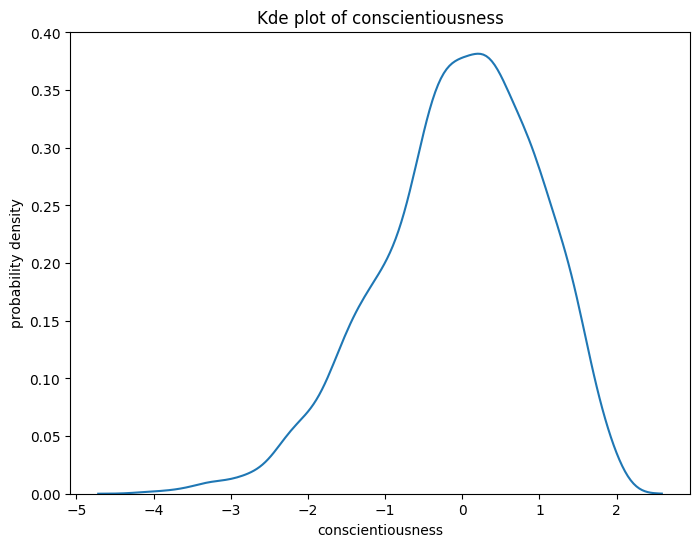

In [82]:
plt.figure(figsize=(8,6))

sns.kdeplot(data_df['conscientiousness'])
plt.title('Kde plot of conscientiousness')
plt.xlabel('conscientiousness')
plt.ylabel('probability density')
plt.show()

<ipython-input-83-aeaccb31e22a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['conscientiousness'], bins=20, kde=True, fit=norm)


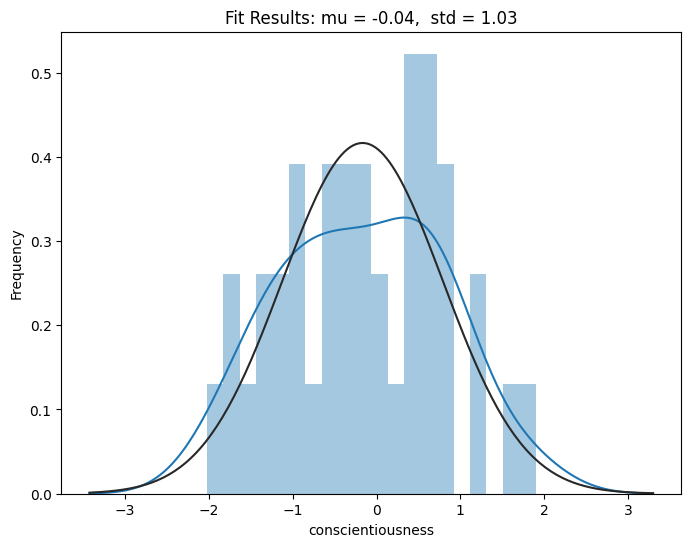

In [83]:
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['conscientiousness'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_frame['conscientiousness'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('conscientiousness')
plt.ylabel('Frequency')
plt.show()

In [84]:
frequnecy_distribution_12_percentage = data_frame['conscientiousness'].value_counts().sort_index()
print(frequnecy_distribution_12_percentage)

-2.0262    1
-1.8083    1
-1.6538    1
-1.4517    1
-1.3447    1
-1.3080    1
-1.1644    2
-1.0208    2
-0.9653    1
-0.7651    1
-0.5899    3
-0.4463    3
-0.1590    2
-0.1082    1
-0.0154    1
 0.0464    1
 0.2718    1
 0.3555    2
 0.4155    1
 0.5100    1
 0.5591    1
 0.6646    2
 0.7027    1
 0.8192    2
 0.8463    1
 1.1283    1
 1.1336    1
 1.5644    1
 1.9011    1
Name: conscientiousness, dtype: int64


# agreeableness

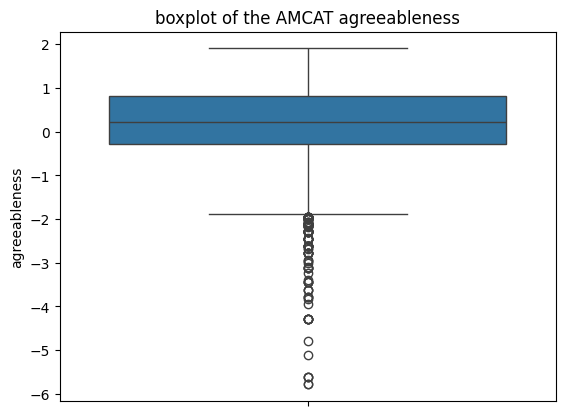

In [85]:
#data_frame = data_df[data_df['agreeableness']>-1]
sns.boxplot(y=data_df['agreeableness'])
plt.title('boxplot of the AMCAT agreeableness')
plt.ylabel('agreeableness')
plt.show()

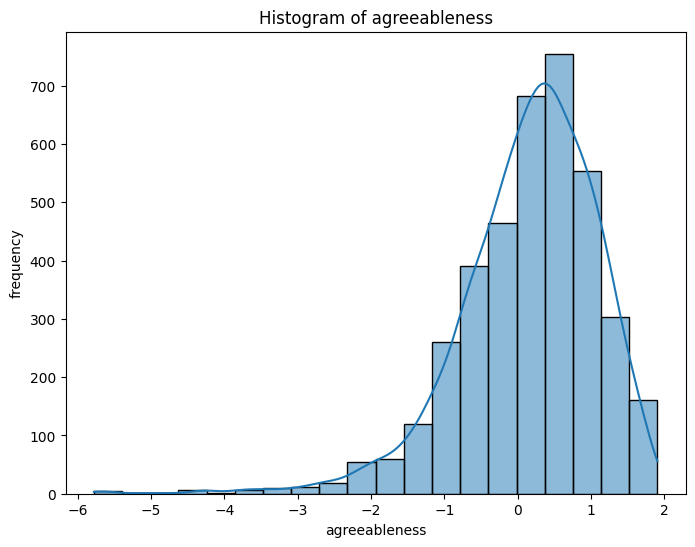

In [86]:
plt.figure(figsize=(8,6))
sns.histplot(data_df['agreeableness'],bins=20,kde=True)
plt.title('Histogram of agreeableness')
plt.xlabel('agreeableness')
plt.ylabel('frequency')
plt.show()

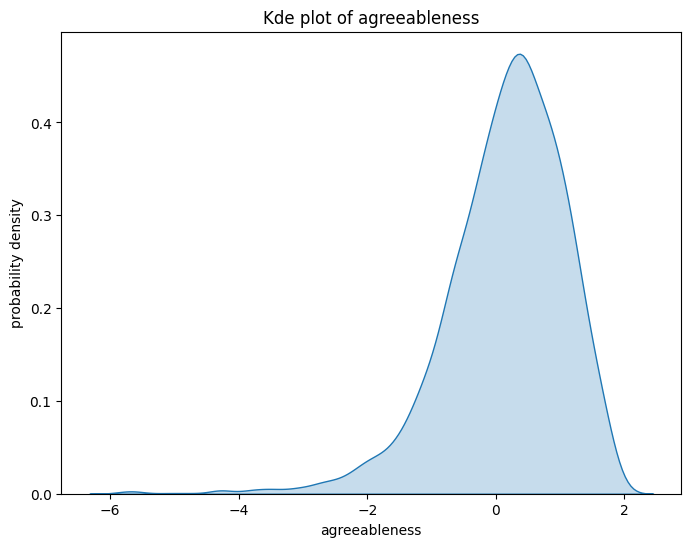

In [87]:
plt.figure(figsize=(8,6))
sns.kdeplot(data_df['agreeableness'],fill=True)
plt.title('Kde plot of agreeableness')
plt.xlabel('agreeableness')
plt.ylabel('probability density')
plt.show()

<ipython-input-88-4980e2ba4c57>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['agreeableness'], bins=20, kde=True, fit=norm)


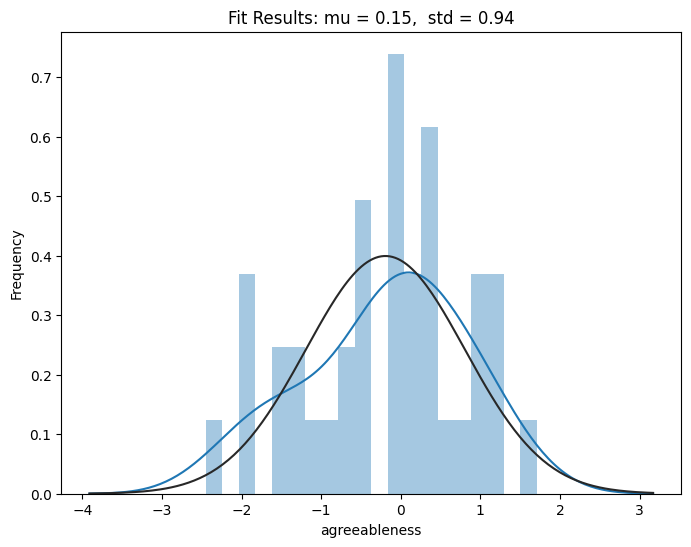

In [88]:

from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(data_df['agreeableness'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.distplot(data_frame['agreeableness'], bins=20, kde=True, fit=norm)
plt.title('Fit Results: mu = {:.2f},  std = {:.2f}'.format(mu, std))
plt.xlabel('agreeableness')
plt.ylabel('Frequency')
plt.show()


# extraversion

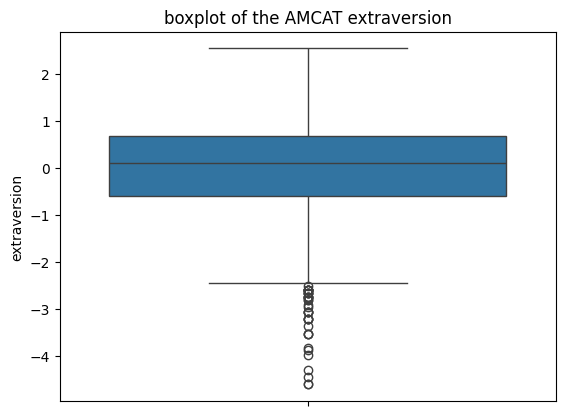

In [89]:

sns.boxplot(y=data_df['extraversion'])
plt.title('boxplot of the AMCAT extraversion')
plt.ylabel('extraversion')
plt.show()

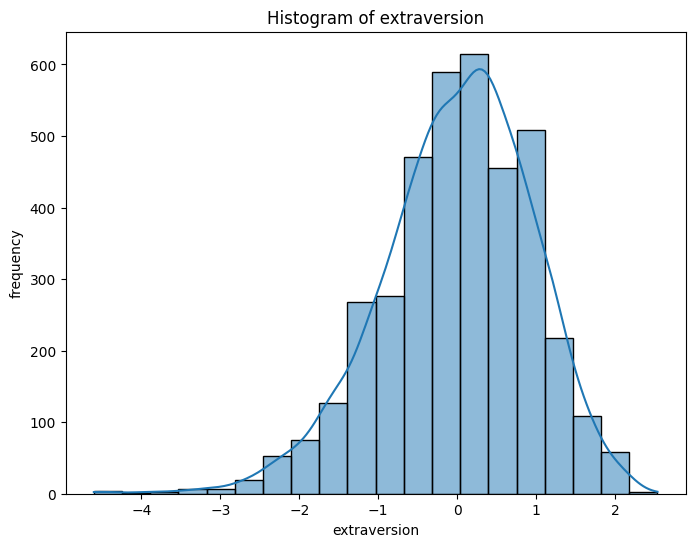

In [90]:
plt.figure(figsize=(8,6))
sns.histplot(data_df['extraversion'],bins=20,kde=True)
plt.title('Histogram of extraversion')
plt.xlabel('extraversion')
plt.ylabel('frequency')
plt.show()

# Neuroticism

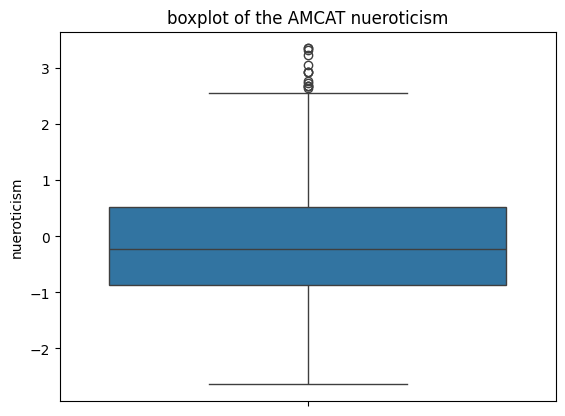

In [91]:
sns.boxplot(y=data_df['nueroticism'])
plt.title('boxplot of the AMCAT nueroticism')
plt.ylabel('nueroticism')
plt.show()

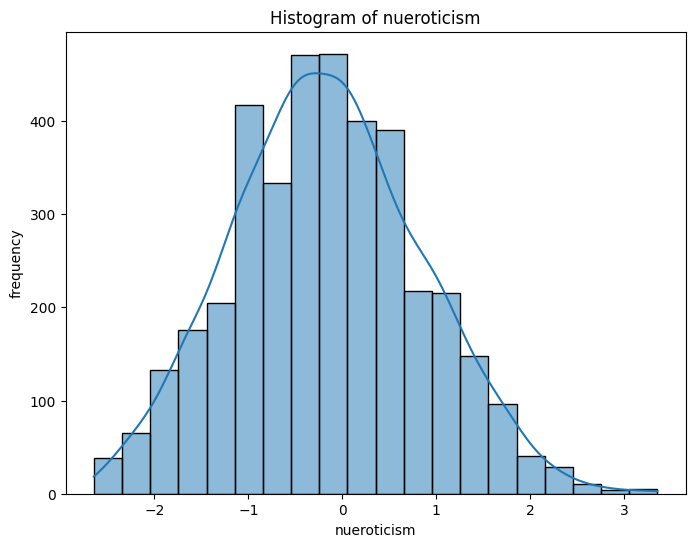

In [92]:
plt.figure(figsize=(8,6))
sns.histplot(data_df['nueroticism'],bins=20,kde=True)
plt.title('Histogram of nueroticism')
plt.xlabel('nueroticism')
plt.ylabel('frequency')
plt.show()

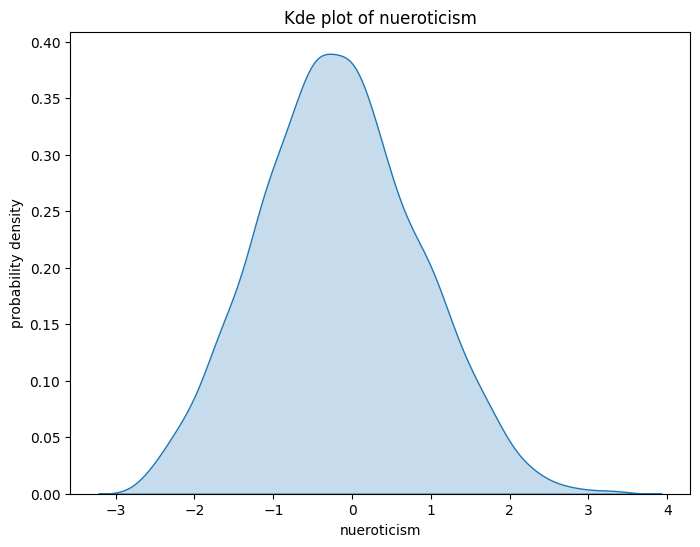

In [93]:
plt.figure(figsize=(8,6))
sns.kdeplot(data_df['nueroticism'],fill=True)
plt.title('Kde plot of nueroticism')
plt.xlabel('nueroticism')
plt.ylabel('probability density')
plt.show()


# openess_to_experience

In [94]:
descriptive_stats = data_df['openess_to_experience'].describe()
print(descriptive_stats)

count    3864.000000
mean       -0.139965
std         1.005369
min        -7.375700
25%        -0.669200
50%        -0.094300
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64


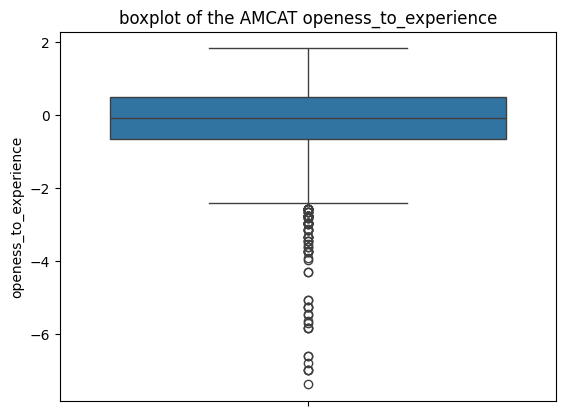

In [95]:

sns.boxplot(y=data_df['openess_to_experience'])
plt.title('boxplot of the AMCAT openess_to_experience')
plt.ylabel('openess_to_experience')
plt.show()

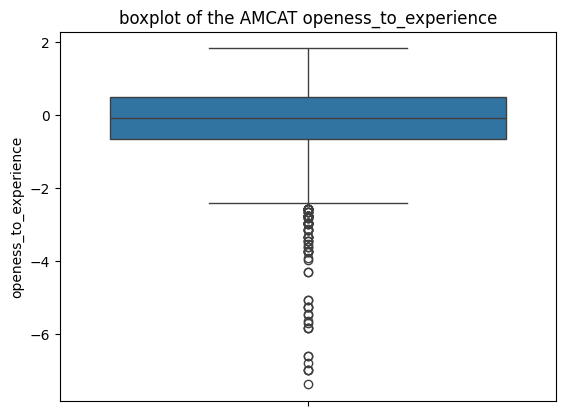

In [96]:

sns.boxplot(y=data_df['openess_to_experience'])
plt.title('boxplot of the AMCAT openess_to_experience')
plt.ylabel('openess_to_experience')
plt.show()

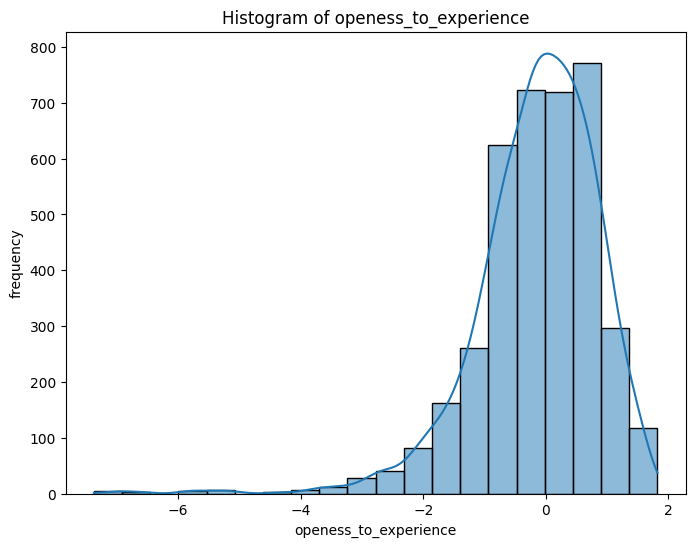

In [97]:
plt.figure(figsize=(8,6))
sns.histplot(data_df['openess_to_experience'],bins=20,kde=True)
plt.title('Histogram of openess_to_experience')
plt.xlabel('openess_to_experience')
plt.ylabel('frequency')
plt.show()

# **CATEGORICAL COLUMNS ANALYSIS**

## Designation

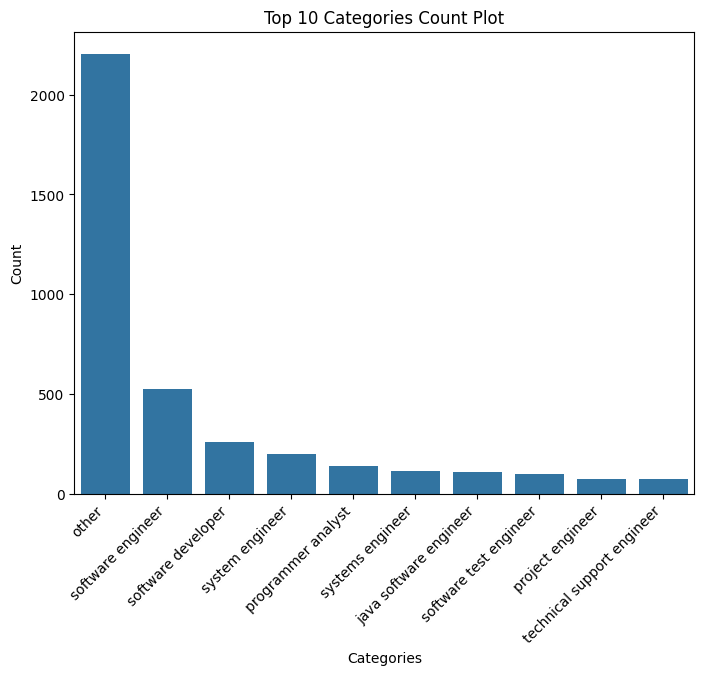

In [98]:
top_n = 10  # Adjust the number of top categories to display
category_counts = data_df['Designation'].value_counts().head(top_n)

plt.figure(figsize=(8, 6))
sns.countplot(x='Designation', data=data_df, order=category_counts.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Categories Count Plot')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

**Observations**

Software engineer is the most common desgination of all, followed by system engineer and software developer.

## JobCity

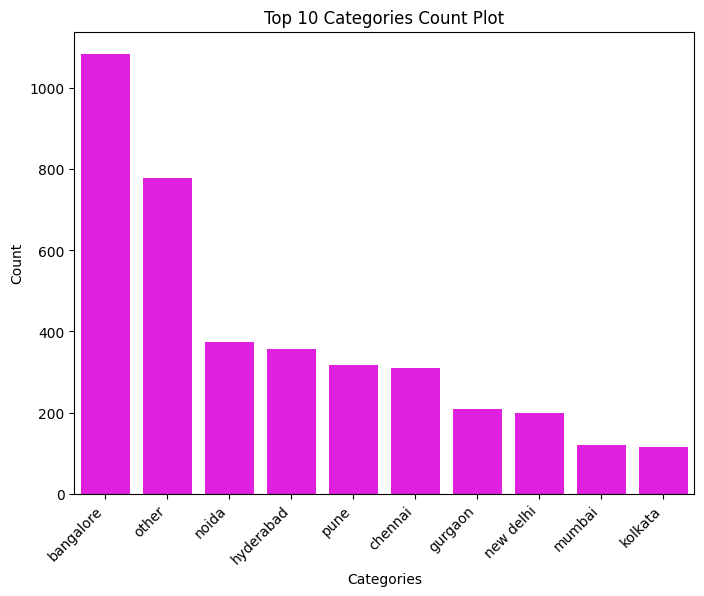

In [153]:
top_n = 10
category_counts = data_df['JobCity'].value_counts().head(top_n)

plt.figure(figsize=(8, 6))
sns.countplot(x='JobCity', data=data_df, order=category_counts.index, color='magenta')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Categories Count Plot')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

**Observations**

Bangalore emerges as the top choice for job placements, followed by Noida, Hyderabad, and Pune. On the other hand, Mumbai and Kolkata are perceived as less favorable options.

## Gender

In [100]:
data_df['Gender'].replace({'f':'Female','m':'Male'}, inplace = True)


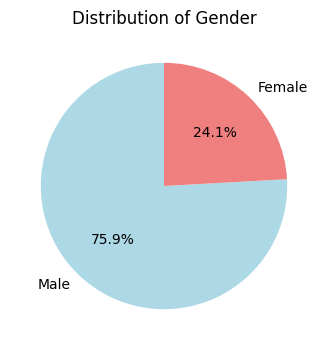

In [101]:
gender_counts = data_df['Gender'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

**Observations**

The dataset exhibits an imbalance in gender distribution, with a notably larger population of males compared to females.

**10th & 12th Board**

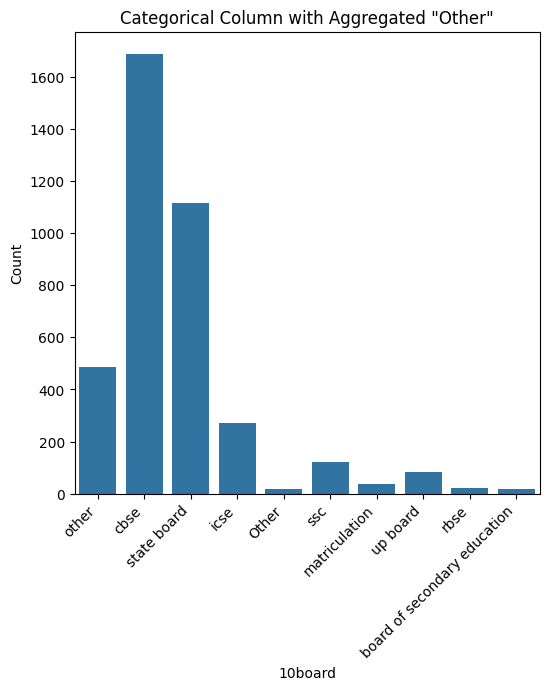

In [102]:
threshold = 20  # Categories with counts below this threshold will be grouped into 'Other'
value_counts = data_df['10board'].value_counts()
mask = data_df['10board'].isin(value_counts[value_counts >= threshold].index)
data_df.loc[~mask, '10board'] = 'Other'

plt.figure(figsize=(6, 6))
sns.countplot(x='10board', data=data_df)
plt.xticks(rotation=45, ha='right')
plt.title('Categorical Column with Aggregated "Other"')
plt.xlabel('10board')
plt.ylabel('Count')
plt.show()

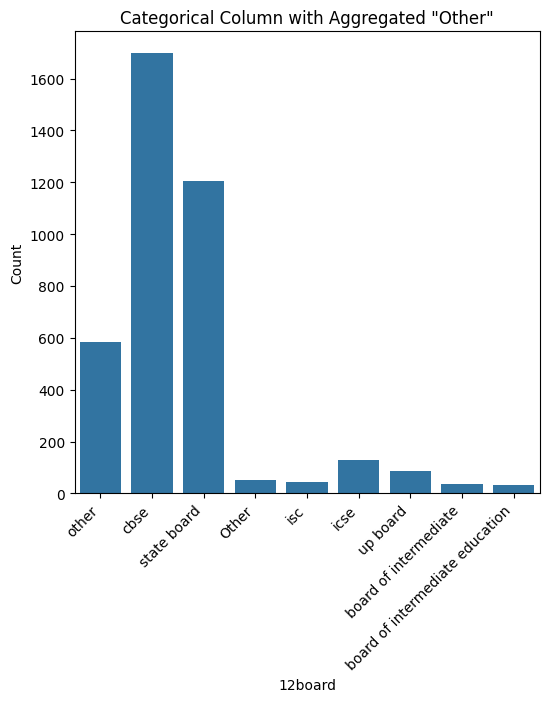

In [103]:
threshold = 20  # Categories with counts below this threshold will be grouped into 'Other'
value_counts = data_df['12board'].value_counts().sort_values(ascending=True)
mask = data_df['12board'].isin(value_counts[value_counts >= threshold].index)
data_df.loc[~mask, '12board'] = 'Other'

plt.figure(figsize=(6, 6))
sns.countplot(x='12board', data=data_df)
plt.xticks(rotation=45, ha='right')
plt.title('Categorical Column with Aggregated "Other"')
plt.xlabel('12board')
plt.ylabel('Count')
plt.show()

**Observations**

CBSE is the most common school board for both 12th and 10th.

## CollegeTier

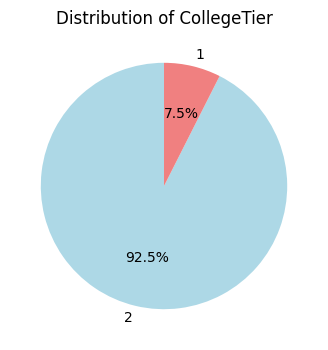

In [104]:
clg_tier_counts = data_df['CollegeTier'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4,4))
plt.pie(clg_tier_counts, labels=clg_tier_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of CollegeTier')
plt.show()

**Observations**

Almost all the colleges are categorized as Tier 2, constituting a percentage of 92.5%.

## Degree

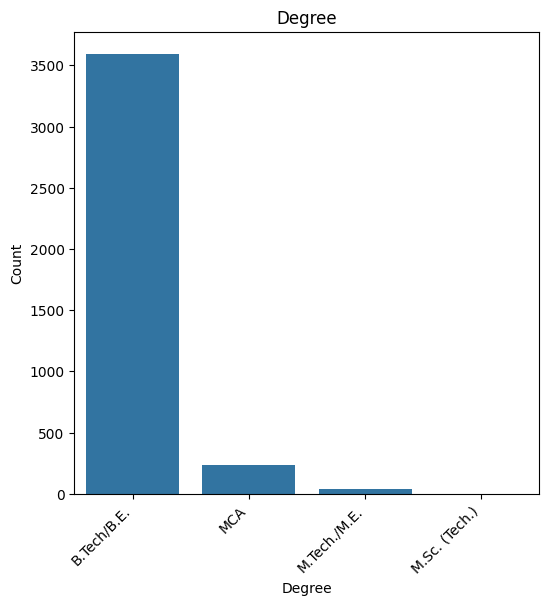

In [105]:
value_counts = data_df['Degree'].value_counts()


plt.figure(figsize=(6, 6))
sns.countplot(x='Degree', data=data_df)
plt.xticks(rotation=45, ha='right')
plt.title('Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

**Observations**

Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

## CollegeCityTier

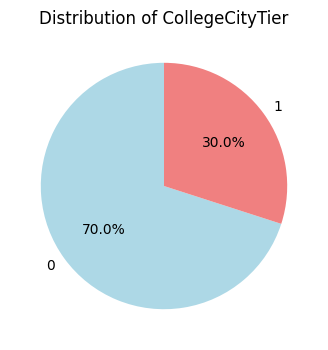

In [106]:
clgcity_tier_counts = data_df['CollegeCityTier'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4,4))
plt.pie(clgcity_tier_counts, labels=clgcity_tier_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of CollegeCityTier')
plt.show()

**Observations**


Majority of the colleges are form Tier 0 city.

## GraduationYear

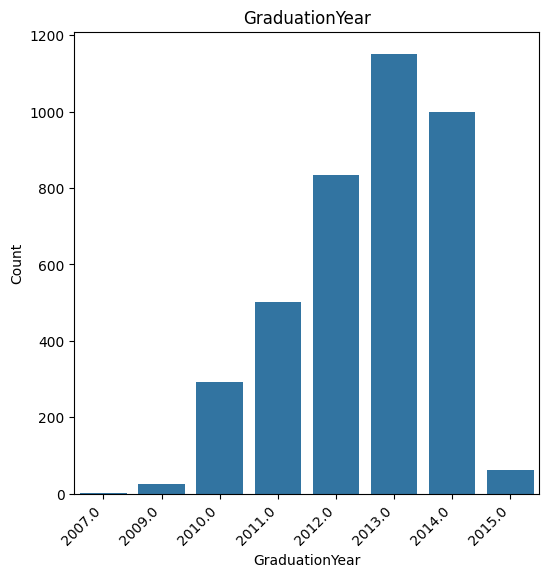

In [107]:
plt.figure(figsize=(6, 6))
sns.countplot(x='GraduationYear', data=data_df)
plt.xticks(rotation=45, ha='right')
plt.title('GraduationYear')
plt.xlabel('GraduationYear')
plt.ylabel('Count')
plt.show()


**Observations**

The highest number of students graduated in 2013, followed by the years 2014 and 2012.






## Handling outliers

In [108]:
def remove_outliers(data_column):
    # Sorting the data in-place
    data_column_sorted = sorted(data_column)

    # Calculate the first and third quartiles
    Q1, Q3 = np.percentile(data_column_sorted, [25, 75])

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Return the lower and upper bounds
    return lower_bound, upper_bound

# Columns to perform outlier removal on
columns_to_process = ['Salary', '10percentage', '12percentage', 'English', 'Logical',
                       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                       'ComputerScience', 'conscientiousness', 'agreeableness',
                       'extraversion', 'nueroticism', 'openess_to_experience']

# Create a copy of the DataFrame
df_no_outliers = data_df.copy()

# Iterate through selected columns and remove outliers
for column in columns_to_process:
    lower_bound, upper_bound = remove_outliers(df_no_outliers[column])

    # Drop rows with values outside the defined bounds
    df_no_outliers = df_no_outliers.drop(df_no_outliers[(df_no_outliers[column] < lower_bound) |
                                                        (df_no_outliers[column] > upper_bound)].index)


In [109]:
print(f'Number of observation with outliers: {data_df.shape[0]}')
print(f'Number of observations without outliers: {df_no_outliers.shape[0]}')

Number of observation with outliers: 3864
Number of observations without outliers: 2551


# **Bivariate Analysis**

## **BAR PLOTS**

### AVG salary for Each Designation

<ipython-input-110-19bf11da7262>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_designation_with_outliers.values, y=avg_salary_by_designation_with_outliers.index, palette='viridis', ax=ax[0])
<ipython-input-110-19bf11da7262>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_designation_no_outliers.values, y=avg_salary_by_designation_no_outliers.index, palette='viridis', ax=ax[1])


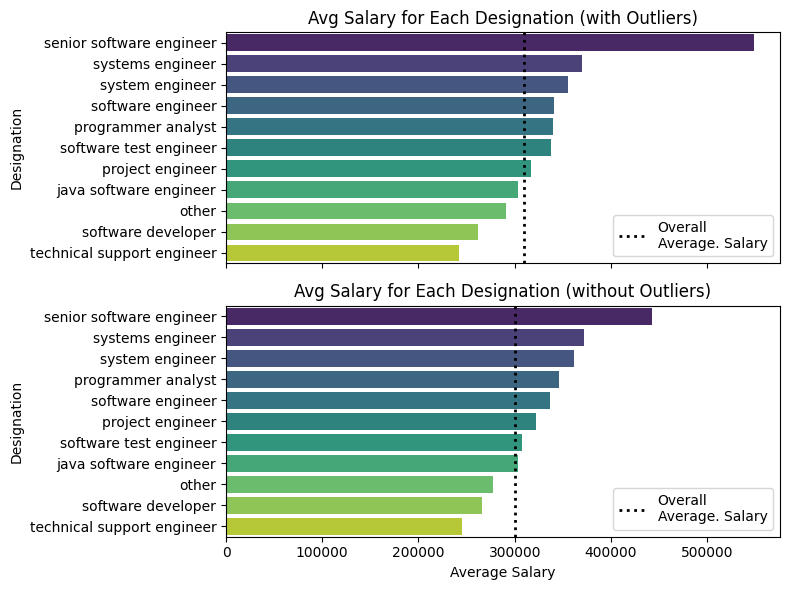

In [110]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

avg_salary_by_designation_with_outliers = data_df.groupby('Designation')['Salary'].mean().sort_values(ascending=False)

sns.barplot(x=avg_salary_by_designation_with_outliers.values, y=avg_salary_by_designation_with_outliers.index, palette='viridis', ax=ax[0])
ax[0].axvline(data_df['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAverage. Salary')
ax[0].set_title('Avg Salary for Each Designation (with Outliers)')
ax[0].set_xlabel('Average Salary')
ax[0].legend()

avg_salary_by_designation_no_outliers = df_no_outliers.groupby('Designation')['Salary'].mean().sort_values(ascending=False)

sns.barplot(x=avg_salary_by_designation_no_outliers.values, y=avg_salary_by_designation_no_outliers.index, palette='viridis', ax=ax[1])
ax[1].axvline(df_no_outliers['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAverage. Salary')
ax[1].set_title('Avg Salary for Each Designation (without Outliers)')
ax[1].set_xlabel('Average Salary')
ax[1].legend()
plt.tight_layout()

plt.show()


**Observations**:

The bar plot illustrates the maximum salary for each Designation, highlighting that Senior Software Engineers command the highest salary. However, it's worth noting that Senior Software Engineers also exhibit the highest standard deviation in their salary distribution. Interestingly, only two designations, namely Software Developer and Technical Support Engineer, have salaries lower than the average salary across all designations.








## Average Salary for each Gender

<ipython-input-111-37d4c20d469f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_designation_with_outliers.values, y=avg_salary_by_designation_with_outliers.index, palette='viridis', ax=ax[0])
<ipython-input-111-37d4c20d469f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_designation_no_outliers.values, y=avg_salary_by_designation_no_outliers.index, palette='viridis', ax=ax[1])


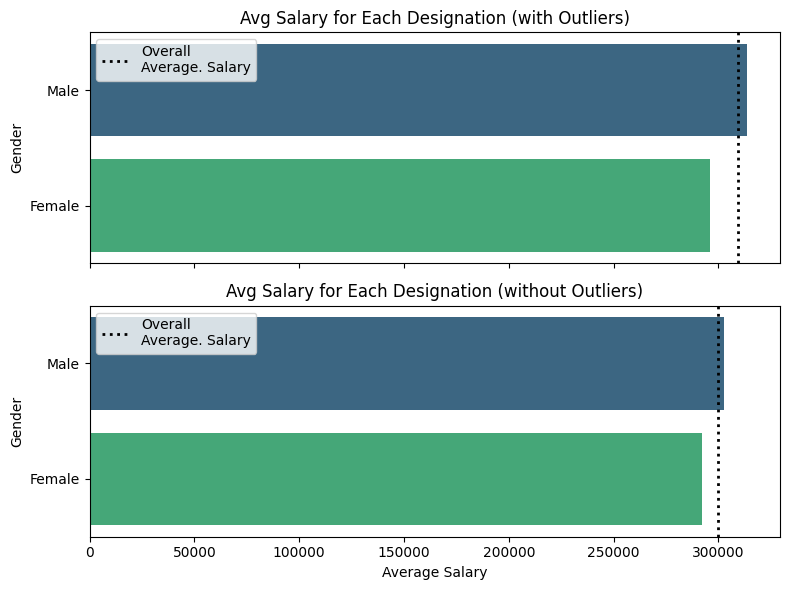

In [111]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

avg_salary_by_designation_with_outliers = data_df.groupby('Gender')['Salary'].mean().sort_values(ascending=False)

sns.barplot(x=avg_salary_by_designation_with_outliers.values, y=avg_salary_by_designation_with_outliers.index, palette='viridis', ax=ax[0])
ax[0].axvline(data_df['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAverage. Salary')
ax[0].set_title('Avg Salary for Each Designation (with Outliers)')
ax[0].set_xlabel('Average Salary')
ax[0].legend()

avg_salary_by_designation_no_outliers = df_no_outliers.groupby('Gender')['Salary'].mean().sort_values(ascending=False)

sns.barplot(x=avg_salary_by_designation_no_outliers.values, y=avg_salary_by_designation_no_outliers.index, palette='viridis', ax=ax[1])
ax[1].axvline(df_no_outliers['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAverage. Salary')
ax[1].set_title('Avg Salary for Each Designation (without Outliers)')
ax[1].set_xlabel('Average Salary')
ax[1].legend()
plt.tight_layout()

plt.show()

**Observations**:

The average salary for both males and females is approximately equal, suggesting a lack of gender bias in terms of salary. However, it's noteworthy that females tend to receive salaries below the overall average salary.







## **ScatterPlots**(Num vs Num)

## Salary & 10th Score

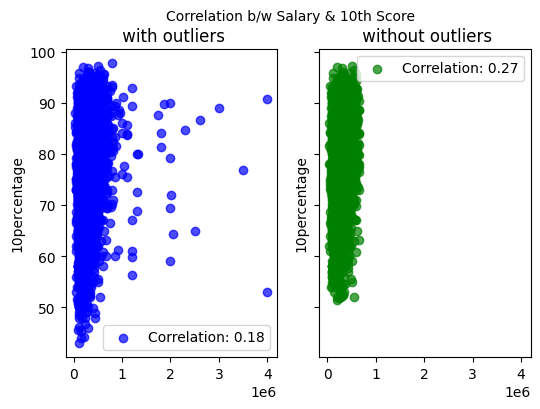

In [112]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)


ax[0].scatter(y='10percentage', x='Salary', data=data_df, alpha=0.7, color='blue',label = f"Correlation: {round(data_df[['Salary','10percentage']].corr().iloc[1,0],2)}")


ax[0].set_title(' with outliers')

ax[0].set_ylabel('10percentage')
ax[0].legend()



ax[1].scatter(y='10percentage', x='Salary', data=df_no_outliers, alpha=0.7, color='green',label = f"Correlation: {round(df_no_outliers[['Salary','10percentage']].corr().iloc[1,0],2)}")


ax[1].set_title(' without outliers')

ax[1].set_ylabel('10percentage')
ax[1].legend()
fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

**Observation**

There does not exist any correlation between Salary and 10th scores.

## salary and 12th score

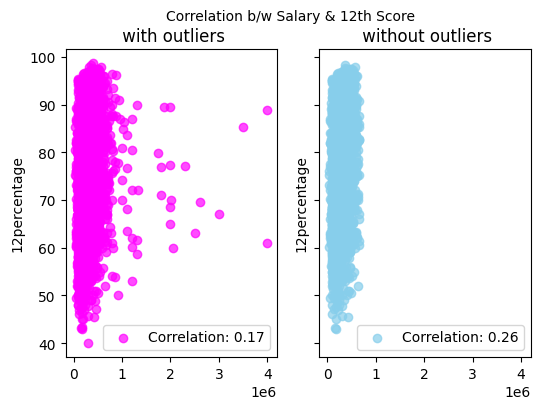

In [113]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)


ax[0].scatter(y='12percentage', x='Salary', data=data_df, alpha=0.7, color='magenta',label = f"Correlation: {round(data_df[['Salary','12percentage']].corr().iloc[1,0],2)}")


ax[0].set_title(' with outliers')

ax[0].set_ylabel('12percentage')
ax[0].legend()



ax[1].scatter(y='12percentage', x='Salary', data=df_no_outliers, alpha=0.7, color='skyblue',label = f"Correlation: {round(df_no_outliers[['Salary','12percentage']].corr().iloc[1,0],2)}")


ax[1].set_title(' without outliers')

ax[1].set_ylabel('12percentage')
ax[1].legend()
fig.suptitle('Correlation b/w Salary & 12th Score', size = 10)
plt.show()

**Observations**

There does not exist any correlation between Salary and 12th percentage.

## salary and CGPA score

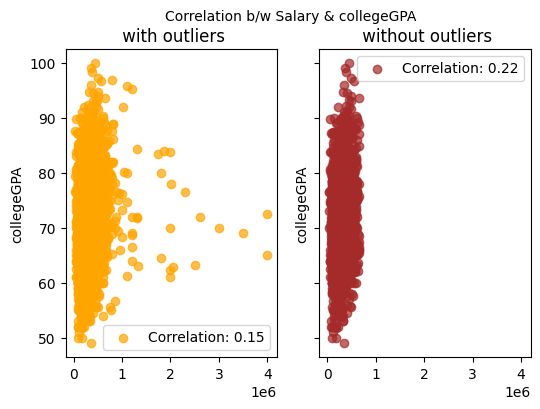

In [114]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)


ax[0].scatter(y='collegeGPA', x='Salary', data=data_df, alpha=0.7, color='orange',label = f"Correlation: {round(data_df[['Salary','collegeGPA']].corr().iloc[1,0],2)}")


ax[0].set_title(' with outliers')

ax[0].set_ylabel('collegeGPA')
ax[0].legend()



ax[1].scatter(y='collegeGPA', x='Salary', data=df_no_outliers, alpha=0.7, color='brown',label = f"Correlation: {round(df_no_outliers[['Salary','collegeGPA']].corr().iloc[1,0],2)}")


ax[1].set_title(' without outliers')

ax[1].set_ylabel('collegeGPA')
ax[1].legend()
fig.suptitle('Correlation b/w Salary & collegeGPA', size = 10)
plt.show()

**Observations**

There does not exist any correlation between Salary and CollegeCGPA.

## Salary and Quant

Text(0.5, 0.98, 'Correlation b/w Salary & Quant')

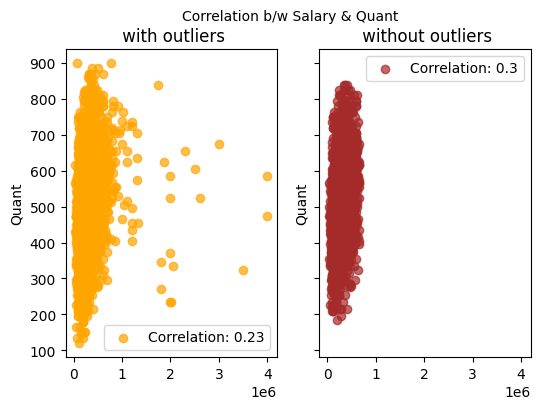

In [115]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)


ax[0].scatter(y='Quant', x='Salary', data=data_df, alpha=0.7, color='orange',label = f"Correlation: {round(data_df[['Salary','Quant']].corr().iloc[1,0],2)}")


ax[0].set_title(' with outliers')

ax[0].set_ylabel('Quant')
ax[0].legend()



ax[1].scatter(y='Quant', x='Salary', data=df_no_outliers, alpha=0.7, color='brown',label = f"Correlation: {round(df_no_outliers[['Salary','Quant']].corr().iloc[1,0],2)}")


ax[1].set_title(' without outliers')

ax[1].set_ylabel('Quant')
ax[1].legend()
fig.suptitle('Correlation b/w Salary & Quant', size = 10)

**Observations**

The scatters plots above gives adequate evidence that salary is not effected by Quant Score

## Salary and English Score

Text(0.5, 0.98, 'Correlation b/w Salary & English')

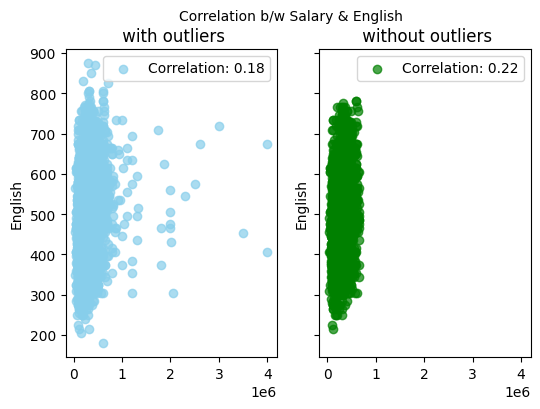

In [116]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)


ax[0].scatter(y='English', x='Salary', data=data_df, alpha=0.7, color='skyblue',label = f"Correlation: {round(data_df[['Salary','English']].corr().iloc[1,0],2)}")


ax[0].set_title(' with outliers')

ax[0].set_ylabel('English')
ax[0].legend()



ax[1].scatter(y='English', x='Salary', data=df_no_outliers, alpha=0.7, color='green',label = f"Correlation: {round(df_no_outliers[['Salary','English']].corr().iloc[1,0],2)}")


ax[1].set_title(' without outliers')

ax[1].set_ylabel('English')
ax[1].legend()
fig.suptitle('Correlation b/w Salary & English', size = 10)

**Observations**

The scatters plots above gives adequate evidence that salary is not effected by English Score

## Salary and Logical scores

Text(0.5, 0.98, 'Correlation b/w Salary & Logical')

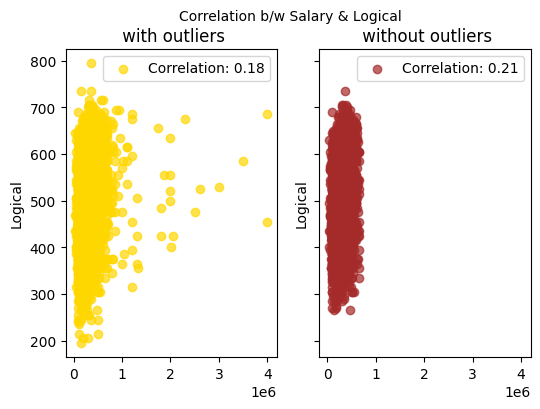

In [117]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)


ax[0].scatter(y='Logical', x='Salary', data=data_df, alpha=0.7, color='gold',label = f"Correlation: {round(data_df[['Salary','Logical']].corr().iloc[1,0],2)}")


ax[0].set_title(' with outliers')

ax[0].set_ylabel('Logical')
ax[0].legend()



ax[1].scatter(y='Logical', x='Salary', data=df_no_outliers, alpha=0.7, color='brown',label = f"Correlation: {round(df_no_outliers[['Salary','Logical']].corr().iloc[1,0],2)}")


ax[1].set_title(' without outliers')

ax[1].set_ylabel('Logical')
ax[1].legend()
fig.suptitle('Correlation b/w Salary & Logical', size = 10)

**Observations**

The scatters plots above gives adequate evidence that salary is not effected by English Score

# Cat Vs Cat

## Gender vs Specilization

<Axes: ylabel='Specialization'>

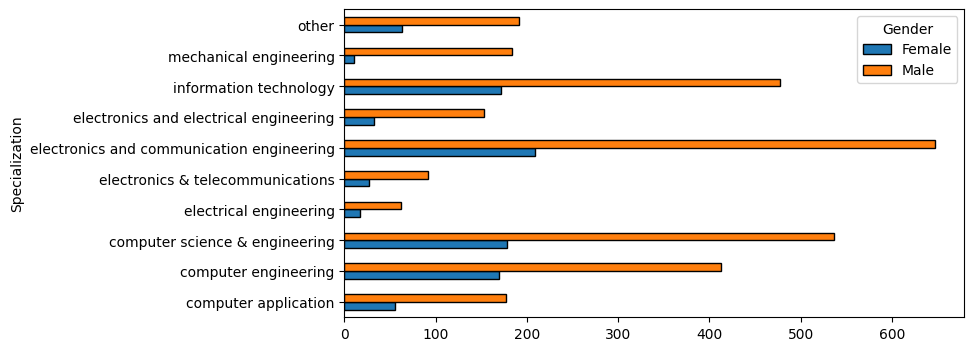

In [118]:
pd.crosstab(data_df['Gender'],data_df['Specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (8,4))

**Observations**

There is an approximate twofold higher representation of males compared to females in each specialization. Additionally, there is a notably lower number of females who opted for mechanical and electronics specializations.

# **Pivot Tables**

## Avg Salary per JobCity

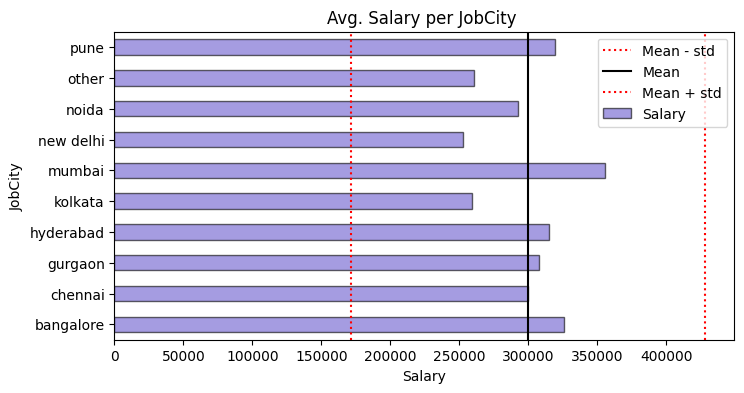

In [119]:
pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = df_no_outliers).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per JobCity ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(df_no_outliers['Salary'].mean() - df_no_outliers['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_no_outliers['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_no_outliers['Salary'].mean() + df_no_outliers['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()


**Obsevation**

Mumbai, Gurgaon, Pune, Hyderabad and Bangalore are the cities having avg salaries greater than mean

## Avg Salary Per College Tier

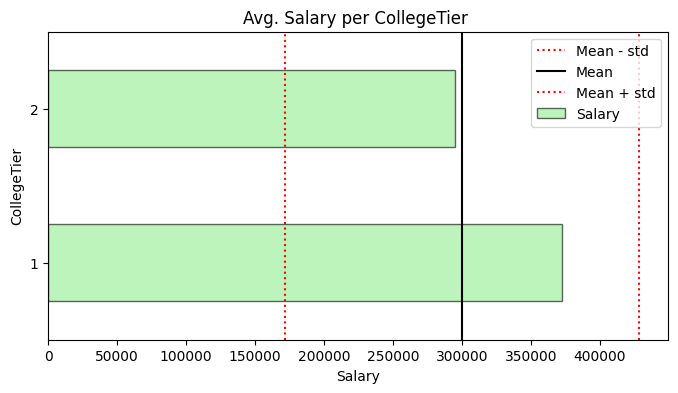

In [154]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = df_no_outliers).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'lightgreen',
                                  title = 'Avg. Salary per CollegeTier ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(df_no_outliers['Salary'].mean() - df_no_outliers['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_no_outliers['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_no_outliers['Salary'].mean() + df_no_outliers['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**Observations**

Colleges within Tier 1 tend to offer higher salaries compared to colleges in Tier 2. Colleges in Tier 2 generally provide salaries below the overall average.

## Average Salary per CollegeCityTier

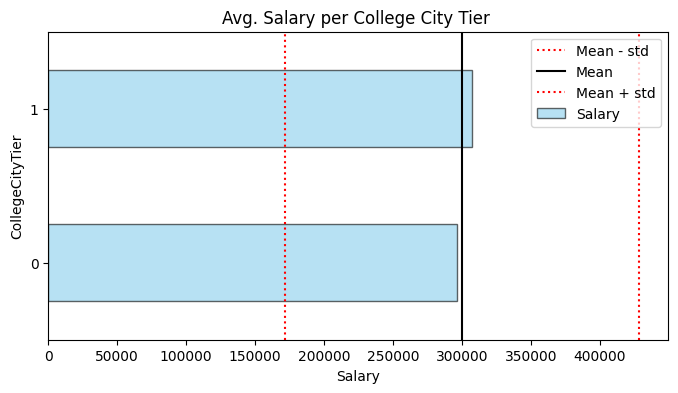

In [121]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = df_no_outliers).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df_no_outliers['Salary'].mean() - df_no_outliers['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_no_outliers['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_no_outliers['Salary'].mean() + df_no_outliers['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()


**Observations**

Cities classified under both Tier 1 and Tier 2 offer students nearly identical salaries.

# **Research Question**

### **1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”**

In [122]:
titles = data_df_original['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(titles)

.net developer                             34
.net web developer                          4
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          46
application developer                      52
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          4
assistant manager                          52
assistant professor                        12
assistant programmer                        3
assistant software engineer                 3
assistant store manager           

In [123]:
data_df_original['Designation'] = data_df_original['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

data_df_original['Designation'] = data_df_original['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [124]:
data_frame = data_df_original[(data_df_original["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (data_df_original["Specialization"].isin(["computer science & engineering", "computer engineering"]))]

<ipython-input-125-55223d9ebce1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


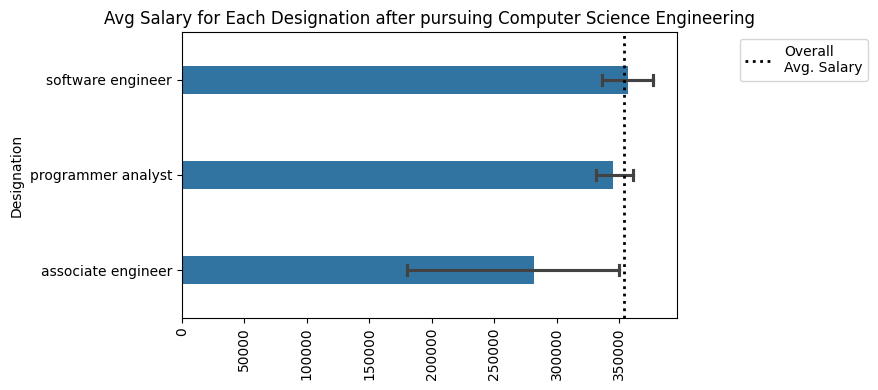

In [125]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=data_frame,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(data_frame['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## **Considering all designation once**

Taking a Random Sample of Salaries

In [126]:
import random
n = 40
sample_salary= random.sample(data_frame['Salary'].tolist(),n)
print(sample_salary)

[120000, 325000, 200000, 305000, 400000, 325000, 325000, 310000, 450000, 270000, 240000, 330000, 335000, 455000, 420000, 390000, 300000, 195000, 475000, 85000, 315000, 650000, 1000000, 210000, 200000, 300000, 230000, 300000, 350000, 370000, 450000, 530000, 350000, 400000, 700000, 260000, 325000, 310000, 110000, 600000]


Sample Values

In [127]:
from scipy.stats import t,norm
import statistics

print('Sample Mean: ', statistics.mean(sample_salary))
print('Sample Standard Deviation: ', statistics.stdev(sample_salary))

Sample Mean:  355375
Sample Standard Deviation:  169063.73968690942


In [128]:
sample_size = 40
sample_mean = statistics.mean(sample_salary)
pop_mean = 275000
sample_std = statistics.stdev(sample_salary)

defining function to find t-score

In [129]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [130]:
t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_value)

3.00677208970687


Finding t_critical value

In [131]:
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2, df = 99)

print(t_critical)

1.9842169515086827


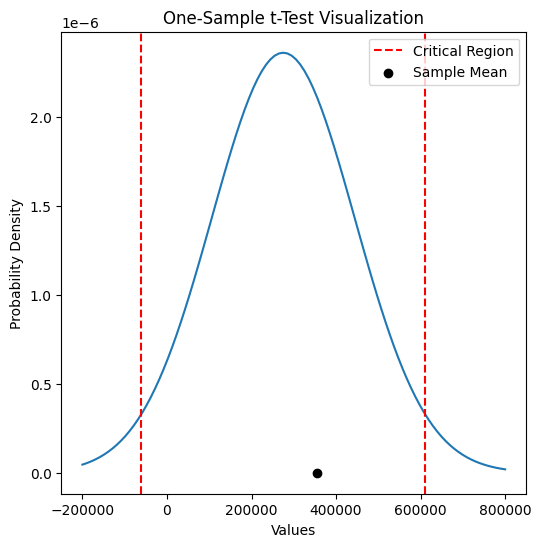

In [132]:
x_min = -200000
x_max = 800000

mean = pop_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(6, 6))

# Plot the normal distribution curve
plt.plot(x, y)

# Highlight the critical region in red
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


plt.axvline(t_critical_left, color='red', linestyle='--', label='Critical Region')
plt.axvline(t_critical_right, color='red', linestyle='--')


plt.scatter(sample_mean, 0, color='black', label='Sample Mean')
plt.annotate("Sample Mean", (sample_mean, 0.02), xytext=(sample_mean + 50000, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.title('One-Sample t-Test Visualization')
plt.xlabel('Values')
plt.ylabel('Probability Density')


plt.legend()

plt.show()

In [133]:
if t_value < t_critical:
    print("Insufficient evidence to reject the Null Hypothesis")
else:
    print("Sufficient evidence to reject the Null Hypothesis")

Sufficient evidence to reject the Null Hypothesis


In [134]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value =", p_value)

if p_value > alpha:
    print("Insufficient evidence to reject the Null Hypothesis")
else:
    print("Sufficient evidence to reject the Null Hypothesis")

p_value = 0.0026403764063600565
Sufficient evidence to reject the Null Hypothesis


Based on the results of the hypothesis testing, it appears that the stated claim is not supported. In this context, the Null Hypothesis is rejected. It's noteworthy that the t_critical value and the probability value (p_value) are indicating a discrepancy or inconsistency with the expected outcomes.

### **Individual Designations Hypothesis**

In [135]:
alpha = 0.05

In [136]:
designation_group = data_frame.groupby('Designation')
avg_salary_by_designation = designation_group['Salary'].mean()
std_dev_salary_by_designation = designation_group['Salary'].std()

In [137]:
print("Mean salaries of the job roles:")
print(avg_salary_by_designation)

print("\nStandard deviation of salaries of the job roles:")
print(std_dev_salary_by_designation)

Mean salaries of the job roles:
Designation
associate engineer    281666.666667
programmer analyst    345267.857143
software engineer     356820.000000
Name: Salary, dtype: float64

Standard deviation of salaries of the job roles:
Designation
associate engineer     89768.220063
programmer analyst     55844.098271
software engineer     165473.604102
Name: Salary, dtype: float64


In [138]:
from scipy.stats import ttest_1samp

prog_analyst_salaries = data_frame.loc[data_frame['Designation'] == 'programmer analyst', 'Salary'].values
software_eng_salaries = data_frame.loc[data_frame['Designation'] == 'software engineer', 'Salary'].values
hardware_eng_salaries = data_frame.loc[data_frame['Designation'] == 'hardware engineer', 'Salary'].values
assoc_eng_salaries = data_frame.loc[data_frame['Designation'] == 'associate engineer', 'Salary'].values

expected_range = (250000, 300000)

for job, salaries in [("programmer analyst", prog_analyst_salaries),
                      ("software engineer", software_eng_salaries),
                      ("hardware engineer", hardware_eng_salaries),
                      ("associate engineer", assoc_eng_salaries)]:

    t_stat, p_val = ttest_1samp(salaries, expected_range[0], alternative='greater')

    print(f"One-sample t-test for {job}:")
    print(f"  t_critical: {t_stat:.2f}")
    print(f"  p_value: {p_val:.5e}")

    if p_val < 0.05:
        print("  Result: There is sufficent evidence to reject the Null Hypothesis\n")
    else:
        print("  Result: There is not enough evidence to reject the Null Hypothesis\n")

One-sample t-test for programmer analyst:
  t_critical: 12.77
  p_value: 2.20314e-18
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for software engineer:
  t_critical: 10.21
  p_value: 5.81591e-21
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for hardware engineer:
  t_critical: nan
  p_value: nan
  Result: There is not enough evidence to reject the Null Hypothesis

One-sample t-test for associate engineer:
  t_critical: 0.61
  p_value: 3.01696e-01
  Result: There is not enough evidence to reject the Null Hypothesis



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Programmer Analyst	- There is sufficent evidence to reject the Null Hypothesis


---


Software Engineer	-	There is sufficent evidence to reject the Null Hypothesis


---


Hardware Engineer	-	There is not enough evidence to reject the Null Hypothesis


---


Associate Engineer	-	There is not enough evidence to reject the Null Hypothesis



##**Is there a relationship between gender and specialization?**

In [139]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

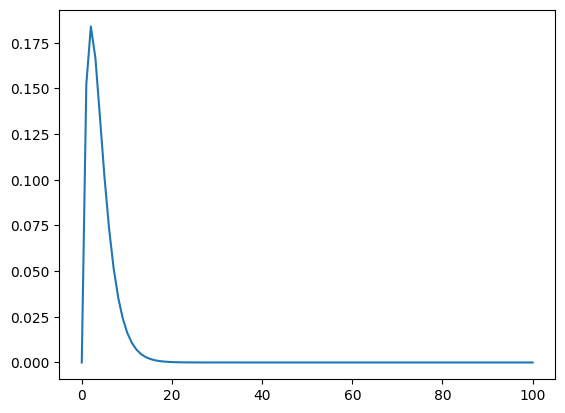

In [140]:
x = np.linspace(0, 100, 100)
y = chi2.pdf(x, df = 4)
plt.plot(x, y)

In [141]:
result = pd.crosstab(df_no_outliers.Specialization,df_no_outliers.Gender)
result

Gender                                     Female  Male
Specialization                                         
computer application                           39   103
computer engineering                          144   305
computer science & engineering                 57   162
electrical engineering                         13    46
electronics & telecommunications               26    80
electronics and communication engineering     173   521
electronics and electrical engineering         28   118
information technology                        116   282
mechanical engineering                         10   150
other                                          47   131

In [142]:
chi2_statistic, chi2_p_value, chi2_dof, chi2_expected = chi2_contingency(result)

print("Statistic            :", chi2_statistic)
print('')
print("p value              :", chi2_p_value)
print('')
print("Degrees of freedom   :", chi2_dof)
print('')
print("Expected frequencies array:\n", chi2_expected)

Statistic            : 48.0799944612541

p value              : 2.4676310205951375e-07

Degrees of freedom   : 9

Expected frequencies array:
 [[ 36.34888279 105.65111721]
 [114.93414347 334.06585653]
 [ 56.05919247 162.94080753]
 [ 15.10270482  43.89729518]
 [ 27.13367307  78.86632693]
 [177.64876519 516.35123481]
 [ 37.37279498 108.62720502]
 [101.87926303 296.12073697]
 [ 40.95648765 119.04351235]
 [ 45.56409251 132.43590749]]


In [143]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, chi2_dof)

chi2_critical

16.918977604620448

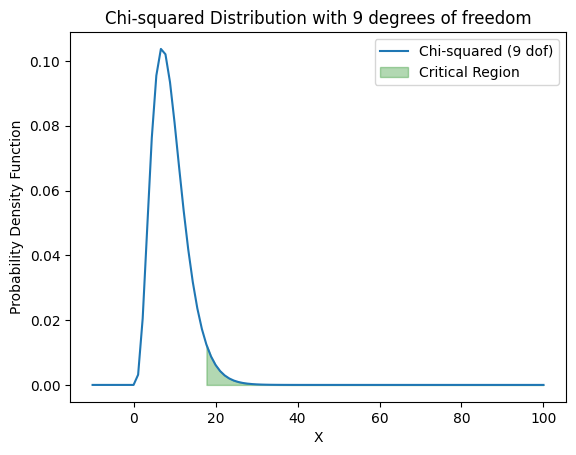

In [144]:
x_min, x_max = -10, 100
x = np.linspace(x_min, x_max, 100)


plt.plot(x, chi2.pdf(x, chi2_dof), label=f'Chi-squared ({chi2_dof} dof)')


plt.fill_between(x, 0, chi2.pdf(x, chi2_dof), where=(x > chi2_critical), color='green', alpha=0.3, label='Critical Region')


plt.xlabel('X')
plt.ylabel('Probability Density Function')
plt.title(f'Chi-squared Distribution with {chi2_dof} degrees of freedom')

plt.legend()

plt.show()

In [145]:
if chi2_statistic > chi2_critical:
    print("Insufficient evidence to reject the Null Hypothesis")
else:
    print("Sufficient evidence to reject the Null Hypothesis")

Insufficient evidence to reject the Null Hypothesis


In [146]:
if(chi2_p_value < alpha):
    print("Insufficient evidence to reject the Null Hypothesis")
else:
    print("Sufficient evidence to reject the Null Hypothesis")

Insufficient evidence to reject the Null Hypothesis


"As a result of the second research question, it is evident that there exists a relationship between Gender and Specialization. This claim has been examined using a Chi-Square test, revealing a statistically significant association between the two categorical variables. It suggests that certain specializations or working fields may pose constraints on candidates based on their gender, potentially due to specific risks or considerations."

# **Conclusion**



1.   Exploring the Engineering Graduates Employment Dataset:
  * The dataset delves into the professional trajectories of engineering graduates, with a primary focus on the target variable, Salary.
  * It also incorporates standardized scores gauging cognitive, technical, and personality skills.

2. Refining the Data:
  * The initial dataset comprises 4000 rows and 40 columns.
  * To streamline the information, we begin by addressing duplicate entries and removing redundant columns.
  * Subsequent steps involve the identification and handling of missing values (NaN) to ensure data accuracy.

3. Data Visualization :

  * Univariate Analysis:

     *   employed a diverse range of visualizations, including Histograms, Box Plots, and dist Plots. These visuals shed light on probability distributions and frequency patterns.

  *  Bivariate Analysis:

     * bivariate analysis unfolds through Scatterplots, Barplots, Crosstabs, Pivot Tables, and Pie Charts.
     * This analysis helps in comparing percentages across different variables
  


# **Does Candidates who score good in English, Quant, Logical earns more**

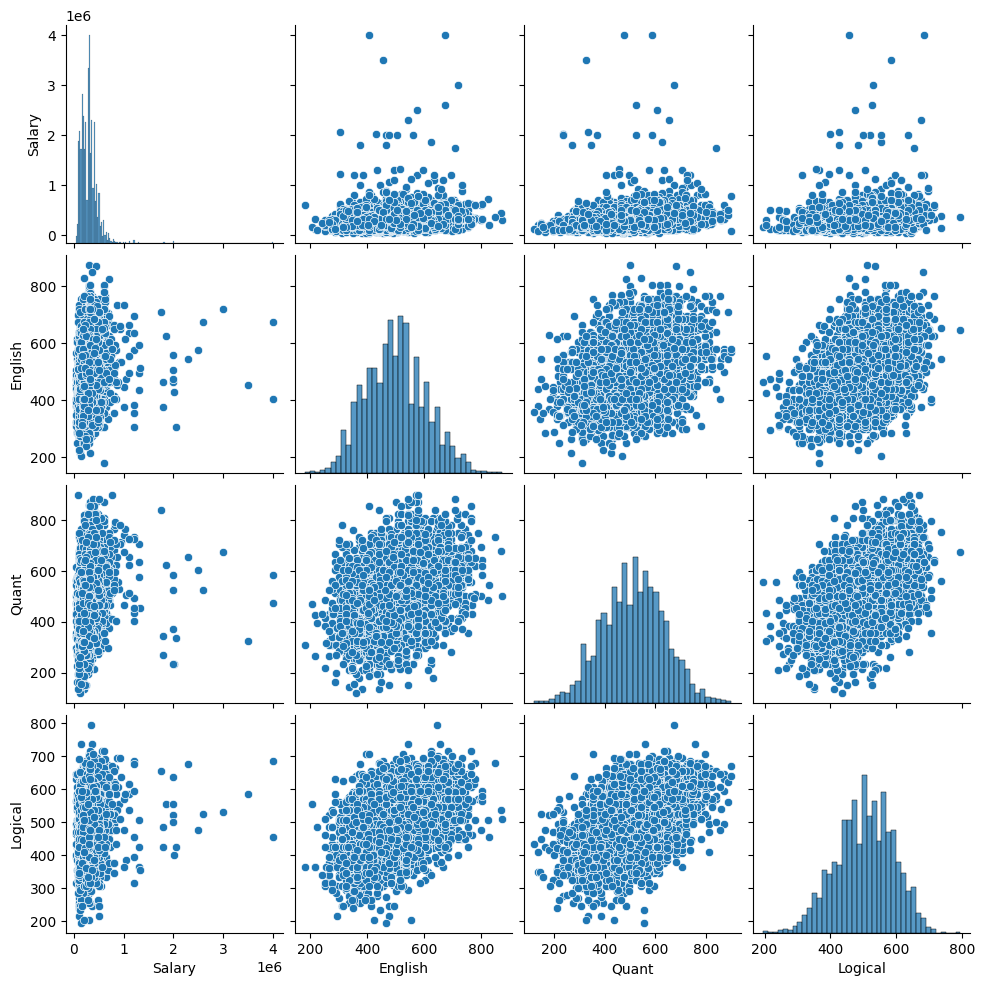

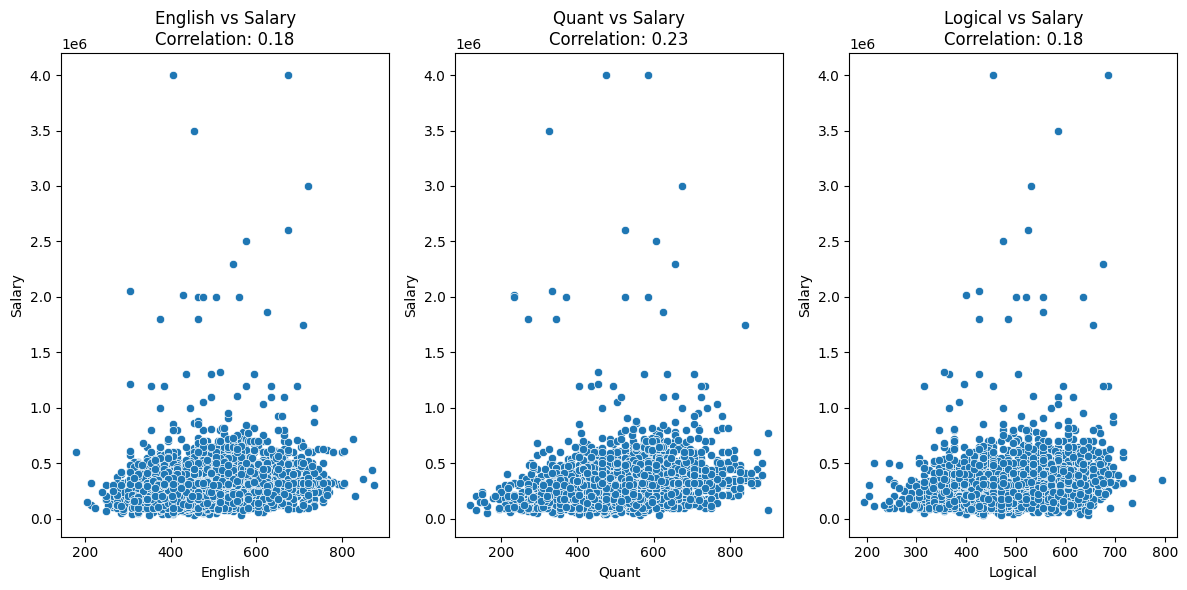

Correlation between English scores and Salary: 0.18
Correlation between Quant scores and Salary: 0.23
Correlation between Logical scores and Salary: 0.18


In [147]:
from scipy.stats import pearsonr


# Step 1: Data Preparation
selected_columns = ['Salary', 'English', 'Quant', 'Logical']
df_selected = data_df[selected_columns].dropna()

# Step 2: Exploratory Data Analysis (EDA)
# Scatterplots
sns.pairplot(df_selected)
plt.show()

# Step 3: Statistical Testing (Pearson Correlation)
corr_english_salary, _ = pearsonr(df_selected['English'], df_selected['Salary'])
corr_quant_salary, _ = pearsonr(df_selected['Quant'], df_selected['Salary'])
corr_logical_salary, _ = pearsonr(df_selected['Logical'], df_selected['Salary'])

# Step 4: Visualization
plt.figure(figsize=(12, 6))

# Scatterplots for each cognitive skill against Salary
plt.subplot(1, 3, 1)
sns.scatterplot(x='English', y='Salary', data=df_selected)
plt.title(f'English vs Salary\nCorrelation: {corr_english_salary:.2f}')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Quant', y='Salary', data=df_selected)
plt.title(f'Quant vs Salary\nCorrelation: {corr_quant_salary:.2f}')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Logical', y='Salary', data=df_selected)
plt.title(f'Logical vs Salary\nCorrelation: {corr_logical_salary:.2f}')

plt.tight_layout()
plt.show()

# Step 5: Summary and Insights
print(f'Correlation between English scores and Salary: {corr_english_salary:.2f}')
print(f'Correlation between Quant scores and Salary: {corr_quant_salary:.2f}')
print(f'Correlation between Logical scores and Salary: {corr_logical_salary:.2f}')



**The correlation results indicate the following:**

* Correlation between English scores and Salary: 0.18
There is a positive correlation of 0.18 between English scores and Salary. This suggests a weak positive relationship. Higher English scores tend to be associated with slightly higher salaries.
Correlation between Quant scores and Salary: 0.23

* There is a positive correlation of 0.23 between Quant scores and Salary. This indicates a weak to moderate positive relationship. Higher Quant scores are somewhat more strongly associated with higher salaries.
Correlation between Logical scores and Salary: 0.18

* There is a positive correlation of 0.18 between Logical scores and Salary. Similar to English scores, this suggests a weak positive relationship. Higher Logical scores are associated with slightly higher salaries.